In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from pandas.plotting import autocorrelation_plot
import tensorflow as tf
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

In [2]:
# Read the dataset from the excel file
file = pd.read_excel('sample.xlsx', sheet_name='Data', index_col=0)
def data_cleaning(data):
    """
        Method Name: data_cleaning
        Description: This function carried out data_cleaing by removing special characters 
        from the dataset and arranging the data in an orderly manner.
        Output: df_store= DataFrame containing initial data
    """
    data = data.T #Transpose the data
    to_remove = ['[', ']', ','] # Characters to remove from the strings of the feature
    for v in to_remove:
        for l in range (data.shape[0]):
            for m in range(data.shape[1]):
                value = data.iloc[l, m].replace(v, '')
                data.iloc[l, m] = value
    df_store=[]
    for i in range(len(data.columns)):
        # Split the data in every feature by a single space
        a = data.iloc[0, i].split(' ')
        b = data.iloc[1, i].split(' ')
        df = pd.DataFrame([a, b]).T
        df.columns = ['ds', 'y'] # Assign the column name of the dataframe
        df = df.astype('float64') # Change the dataset type to float
        df['ds'] = pd.to_datetime(df['ds'], unit='s') # Make the feature datatype as datetime
        df.to_csv('sample{x}_time.csv'.format(x=i)) # Save the dataset into csv format
        df_store.append(df)
    return df_store


class Visualize:
    def __init__(self):
        pass
    def adfuller_test(self, value):
        """
        Method Name: adfuller_test
        Description: This function carries out a statistical adfuller test and identifies if the data is
        stationary or non-stationary.
        Output: None
        """
        result = adfuller(value)
        labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
        for value, label in zip(result, labels):
            print(label + ' : ' + str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
    def data_visualize(self, data):
        """
        Method Name: data_visualize
        Description: This function crop the unnecessary intial part of the dataset.
        Output: df=clean dataset
                true_val_df='y' column values for sample where 'ds' column is null
        """
        true_val_df = []
        df = []
        for i, d in enumerate(data):
            true_val_df.append(d.loc[d['ds'].isnull()]['y'])
            # remove outlier data from the samples
            if i==0:
                d = d.loc[~(d['ds']=='1970-01-01 04:29:36')]
            elif i==1:
                d = d.loc[~(d['ds']=='1970-01-01 04:29:28.000')]
            d.dropna(inplace=True)
            df.append(d)
            #d=d.set_index('ds')
            d.reset_index(inplace=True)
            d.drop(['ds', 'index'],axis=1,inplace=True)
            # visualize the samples
            d.plot()
            plt.title('Sample {x}'.format(x=i+1))
            plt.xlabel('Time')
            plt.ylabel('Power in watt')
            #plt.savefig('sample_{x}_{y}.png'.format(x=i,y=message))
            plt.show()
            print('\nadfuller results for sample 1\n')
            self.adfuller_test(df[i]['y']) # check if data is stationary or not
        return df,true_val_df
    

def MAE(y, yhat):
    """
        Method Name: MAE
        Description: This function calculates the mean-squared error for the model by taking into consideration of 
        actual and the predicted values. 
        Output: df_store= mae=Mean_squared_error value
    """
    diff = np.abs(np.array(y)-np.array(yhat))
    try:
        mae =  round(np.mean(np.fabs(diff)), 3)
    except:
        print("Error while calculating")
        mae = np.nan
    return mae

# Clean the sample data, visuallize it and check if stationary or non-stationary

<ipython-input-2-a1f47d40c85d>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.dropna(inplace=True)
C:\Users\babal\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


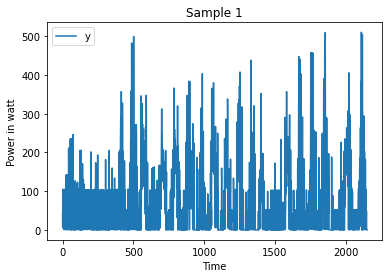


adfuller results for sample 1

ADF Test Statistic : -9.854195618926708
p-value : 4.4037750796372995e-17
#Lags Used : 24
Number of Observations Used : 2125
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<ipython-input-2-a1f47d40c85d>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.dropna(inplace=True)
C:\Users\babal\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


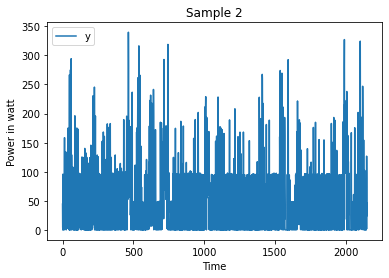


adfuller results for sample 1

ADF Test Statistic : -8.527825507779758
p-value : 1.0573709820509315e-13
#Lags Used : 26
Number of Observations Used : 2123
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<ipython-input-2-a1f47d40c85d>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.dropna(inplace=True)
C:\Users\babal\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


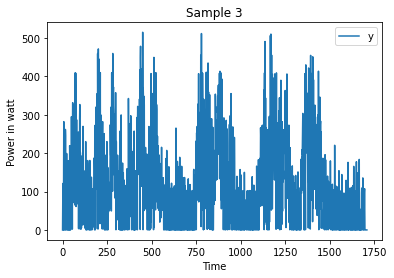


adfuller results for sample 1

ADF Test Statistic : -4.966181559034286
p-value : 2.5880024442994113e-05
#Lags Used : 25
Number of Observations Used : 1684
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [3]:
visual = Visualize()
df_stg = data_cleaning(file)
df = []
df.append(df_stg[0][190:])
df.append(df_stg[1][190:])
df.append(df_stg[2][190:])
df, true_val_df_vs4 = visual.data_visualize(df)

In [4]:
def diagnostic_plots(df, variable):
    """
        Method Name: diagnostic_plots
        Description: This function plots a histogram and a Q-Q plot side by side, for the sample.
        Output: None
    """ 
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    df[variable].hist() # plot histogram for a variable in the dataset 
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt) # plots a Q-Q plot 
    plt.show()

sample:0


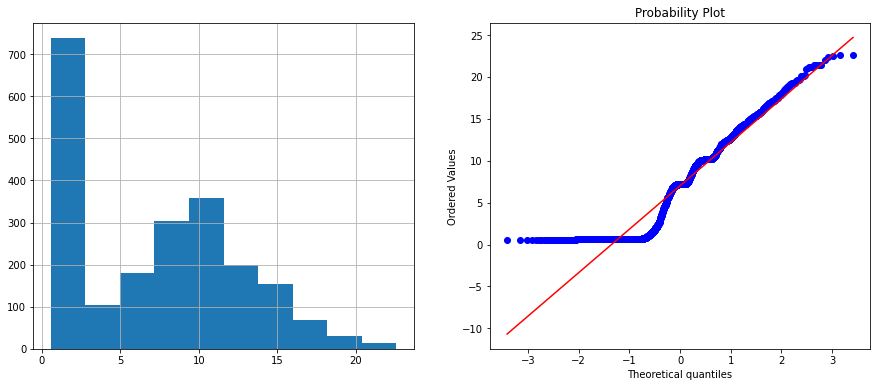

sample:1


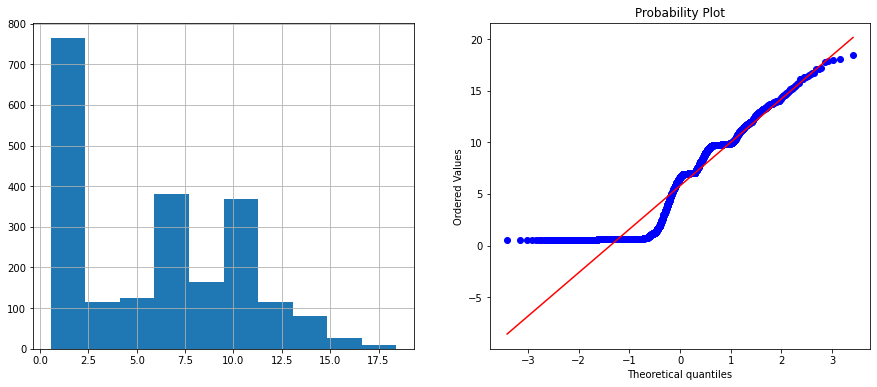

<ipython-input-5-97d50257dae6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v['y'] = v['y']**0.5 # Transform the dataset


sample:2


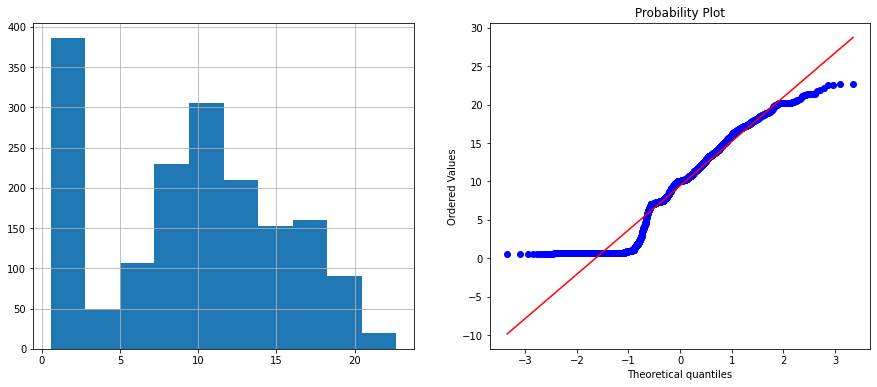

In [5]:
# Perform square root transformation on the sample datsets
norm_df = []
for i,v in enumerate(df):
    v['y'] = v['y']**0.5 # Transform the dataset
    print('sample:{}'.format(i))
    diagnostic_plots(v, 'y') # Function plots Q-Q plot
    norm_df.append(v) # Add the transformed dataset in the list
    

# Identify the p and q values for the samples for arima

sample 1


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


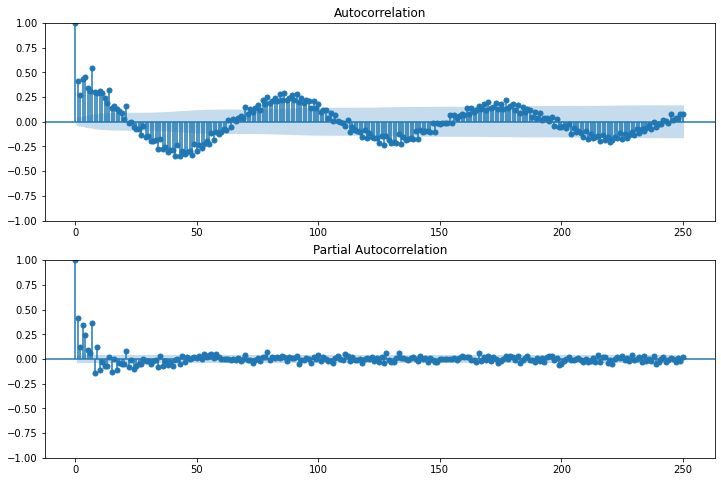

sample 2


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


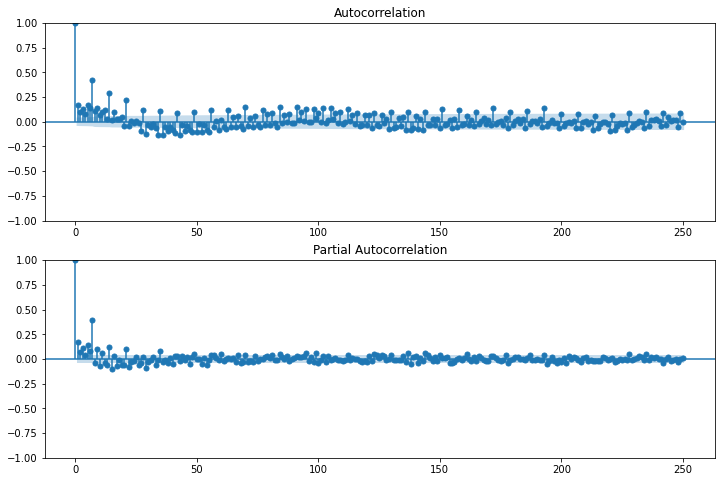

sample 3


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


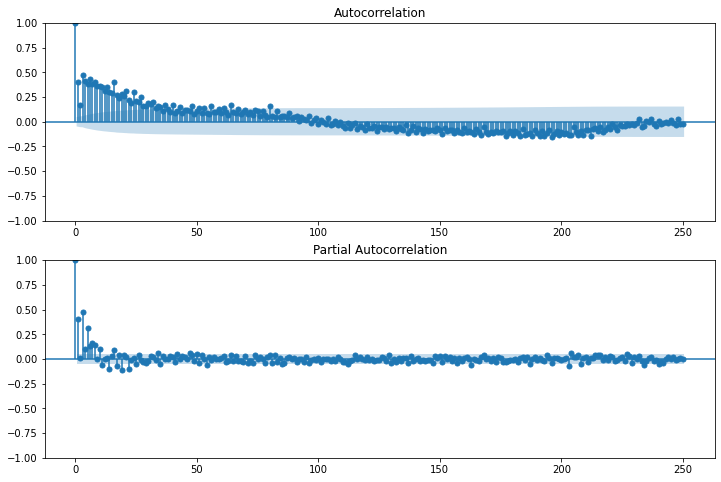

In [6]:
# Manually identify the p and q values using the partial and autocorreclation plots 
for i,v in enumerate(norm_df):
    print('sample {}'.format(i+1))
    fig = plt.figure(figsize = (12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(v['y'].copy(), ax=ax1, lags=250)  # plot the autocorrelation
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(v['y'].dropna(), ax=ax2, lags=250) # plot the partial autocorrelation
    plt.show()


# Arima Model

Sample1


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2130
Model:                ARIMA(5, 0, 13)   Log Likelihood               -5928.848
Date:                Thu, 24 Mar 2022   AIC                          11897.695
Time:                        09:20:33   BIC                          12010.973
Sample:                             0   HQIC                         11939.156
                               - 2130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0281      0.226     31.160      0.000       6.586       7.470
ar.L1          0.6585      0.527      1.250      0.211      -0.374       1.691
ar.L2          1.4810      0.080     18.435      0.0

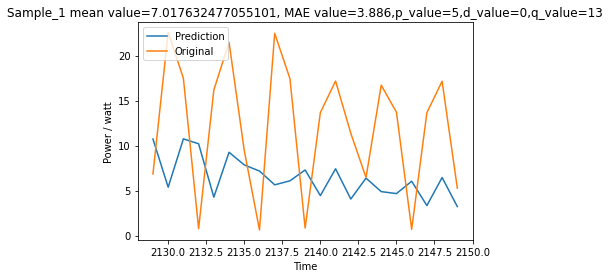

Model Diagonistics for Sample_0


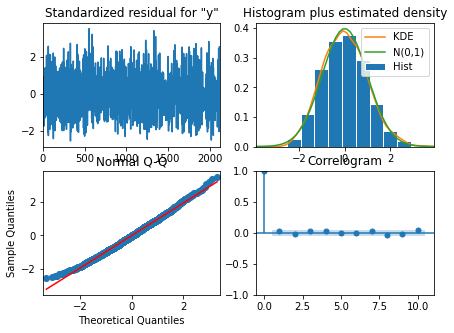

Sample1


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2130
Model:                ARIMA(5, 0, 16)   Log Likelihood               -5920.272
Date:                Thu, 24 Mar 2022   AIC                          11886.543
Time:                        09:20:51   BIC                          12016.812
Sample:                             0   HQIC                         11934.223
                               - 2130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8780      0.233     29.491      0.000       6.421       7.335
ar.L1          0.3999      1.710      0.234      0.815      -2.952       3.752
ar.L2          1.5360      0.278      5.520      0.0

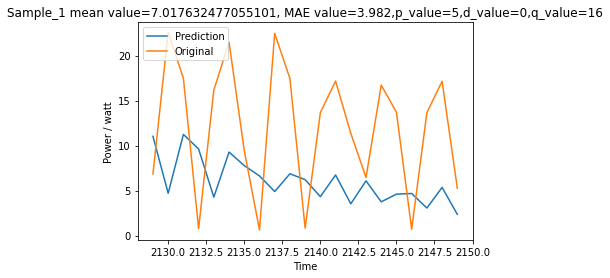

Model Diagonistics for Sample_0


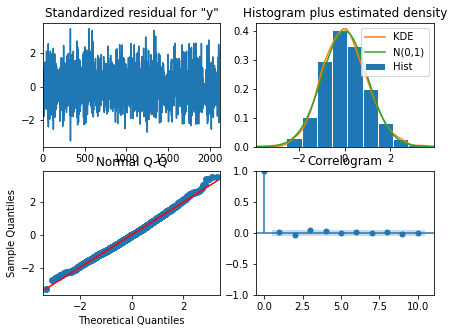

Sample1


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2130
Model:               ARIMA(10, 0, 13)   Log Likelihood               -5939.825
Date:                Thu, 24 Mar 2022   AIC                          11929.650
Time:                        09:21:03   BIC                          12071.247
Sample:                             0   HQIC                         11981.476
                               - 2130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0143      0.255     27.540      0.000       6.515       7.514
ar.L1          0.4611      0.971      0.475      0.635      -1.442       2.364
ar.L2          0.2027      0.702      0.289      0.7

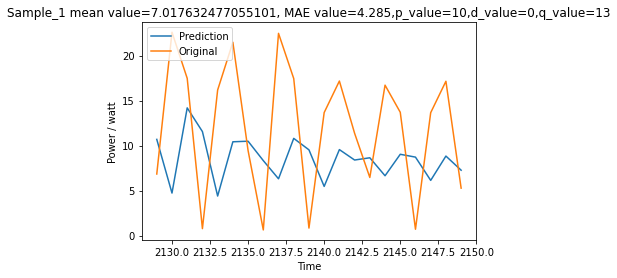

Model Diagonistics for Sample_0


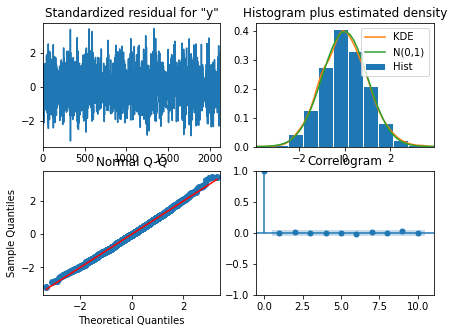

Sample1


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\babal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2130
Model:               ARIMA(10, 0, 16)   Log Likelihood               -5929.107
Date:                Thu, 24 Mar 2022   AIC                          11914.215
Time:                        09:21:19   BIC                          12072.803
Sample:                             0   HQIC                         11972.260
                               - 2130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0188      0.513     13.679      0.000       6.013       8.025
ar.L1          0.7658      0.507      1.511      0.131      -0.228       1.759
ar.L2         -0.7162      0.359     -1.997      0.0

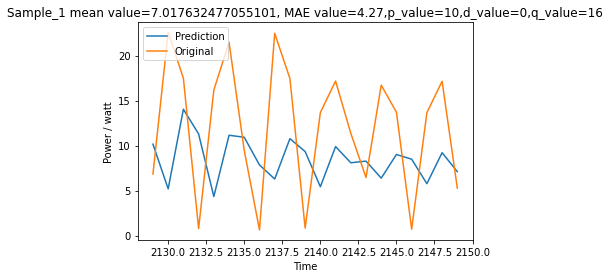

Model Diagonistics for Sample_0


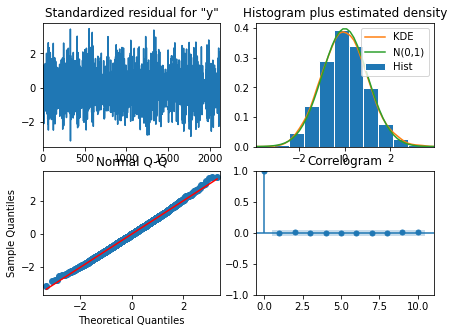

Sample2


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\babal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2130
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -6008.668
Date:                Thu, 24 Mar 2022   AIC                          12033.336
Time:                        09:21:23   BIC                          12078.647
Sample:                             0   HQIC                         12049.920
                               - 2130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8291      1.339      4.352      0.000       3.204       8.454
ar.L1         -0.7883      0.012    -63.589      0.000      -0.813      -0.764
ar.L2          0.8071      0.013     60.452      0.0

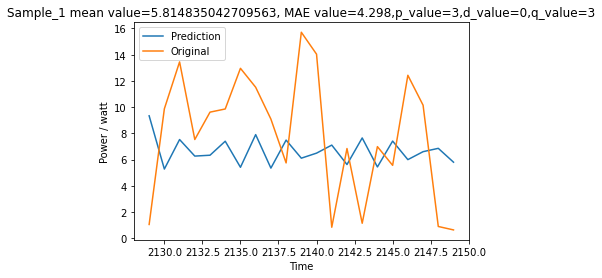

Model Diagonistics for Sample_1


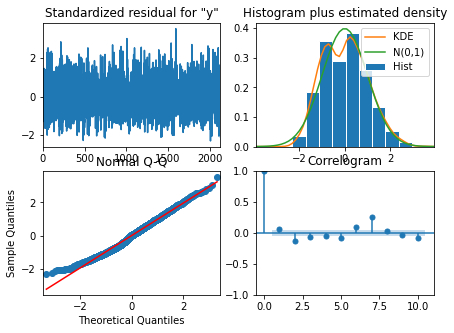

Sample2


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2130
Model:                 ARIMA(3, 0, 9)   Log Likelihood               -5896.679
Date:                Thu, 24 Mar 2022   AIC                          11821.357
Time:                        09:21:29   BIC                          11900.652
Sample:                             0   HQIC                         11850.380
                               - 2130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7867      0.263     21.989      0.000       5.271       6.302
ar.L1         -0.9024      0.021    -43.531      0.000      -0.943      -0.862
ar.L2          0.6270      0.036     17.314      0.0

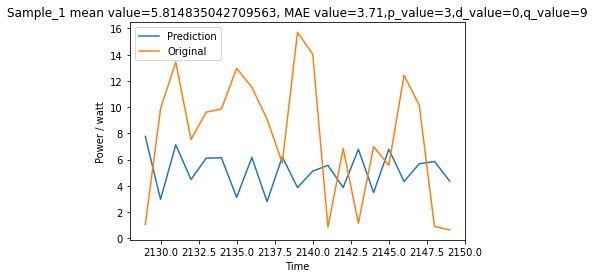

Model Diagonistics for Sample_1


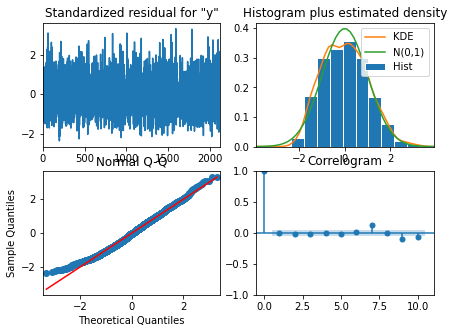

Sample2


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\babal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2130
Model:                 ARIMA(7, 0, 3)   Log Likelihood               -5924.136
Date:                Thu, 24 Mar 2022   AIC                          11872.271
Time:                        09:21:32   BIC                          11940.238
Sample:                             0   HQIC                         11897.148
                               - 2130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8111      0.285     20.377      0.000       5.252       6.370
ar.L1         -0.0361      0.059     -0.611      0.541      -0.152       0.080
ar.L2          0.1876      0.048      3.898      0.0

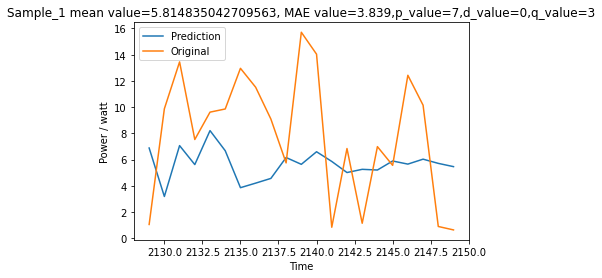

Model Diagonistics for Sample_1


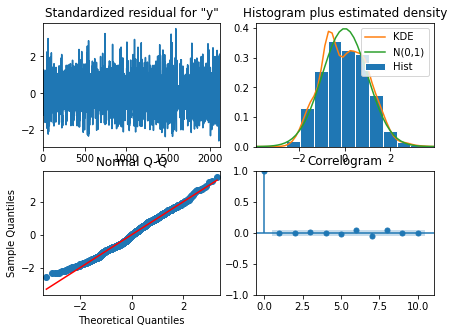

Sample2


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2130
Model:                 ARIMA(7, 0, 9)   Log Likelihood               -5830.880
Date:                Thu, 24 Mar 2022   AIC                          11697.761
Time:                        09:21:40   BIC                          11799.710
Sample:                             0   HQIC                         11735.075
                               - 2130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8088      0.312     18.638      0.000       5.198       6.420
ar.L1         -0.1447      0.041     -3.537      0.000      -0.225      -0.065
ar.L2         -0.0289      0.040     -0.728      0.4

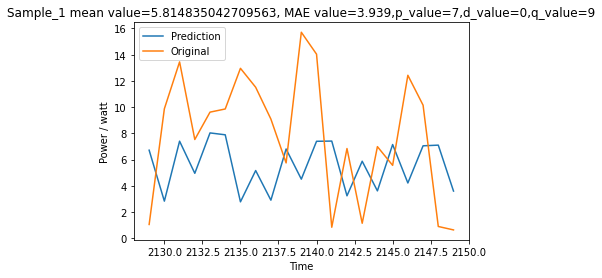

Model Diagonistics for Sample_1


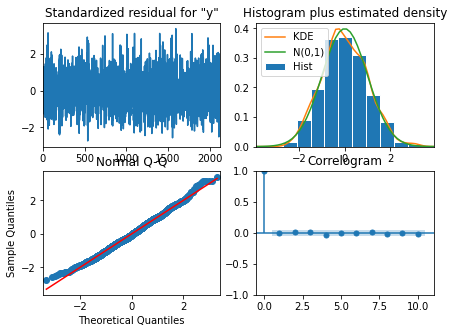

Sample2


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2130
Model:                ARIMA(15, 0, 3)   Log Likelihood               -5859.157
Date:                Thu, 24 Mar 2022   AIC                          11758.313
Time:                        09:21:51   BIC                          11871.591
Sample:                             0   HQIC                         11799.774
                               - 2130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8197      0.164     35.434      0.000       5.498       6.142
ar.L1         -0.5886      0.026    -22.696      0.000      -0.639      -0.538
ar.L2          0.8648      0.027     31.577      0.0

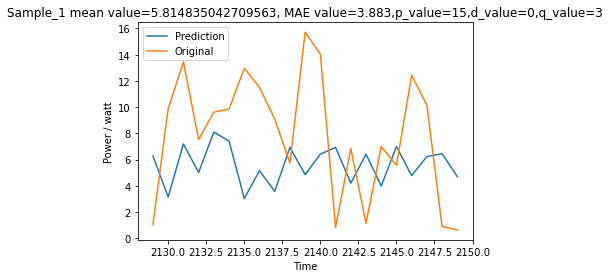

Model Diagonistics for Sample_1


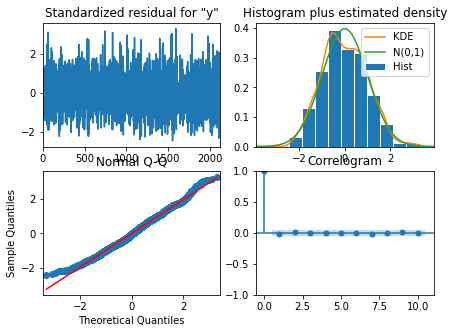

Sample2


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\babal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2130
Model:                ARIMA(15, 0, 9)   Log Likelihood               -5834.530
Date:                Thu, 24 Mar 2022   AIC                          11721.060
Time:                        09:22:04   BIC                          11868.320
Sample:                             0   HQIC                         11774.958
                               - 2130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8089      0.274     21.235      0.000       5.273       6.345
ar.L1          0.8326     11.869      0.070      0.944     -22.430      24.095
ar.L2         -0.2050      5.913     -0.035      0.9

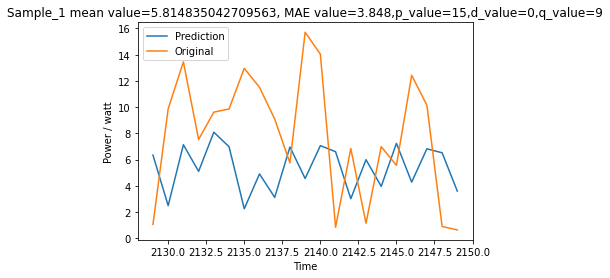

Model Diagonistics for Sample_1


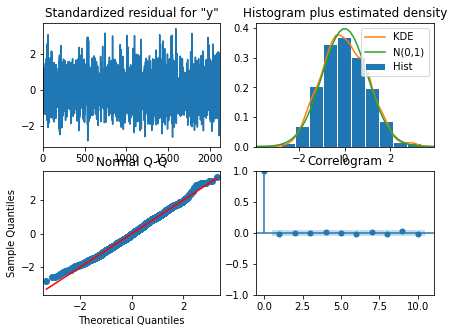

Sample3
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1690
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5083.218
Date:                Thu, 24 Mar 2022   AIC                          10174.435
Time:                        09:22:06   BIC                          10196.165
Sample:                             0   HQIC                         10182.482
                               - 1690                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2761      1.029      9.012      0.000       7.259      11.293
ar.L1          0.9848      0.006    174.788      0.000       0.974       0.996
ma.L1         -0.8685      0.015    -56.292 

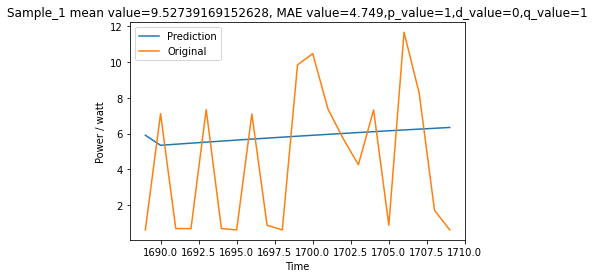

Model Diagonistics for Sample_2


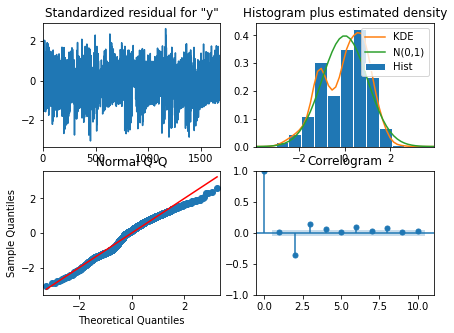

Sample3


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1690
Model:                ARIMA(1, 0, 39)   Log Likelihood               -4813.117
Date:                Thu, 24 Mar 2022   AIC                           9710.234
Time:                        09:23:46   BIC                           9938.398
Sample:                             0   HQIC                          9794.726
                               - 1690                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5786      0.603     15.891      0.000       8.397      10.760
ar.L1          0.7462      0.495      1.508      0.132      -0.224       1.716
ma.L1         -0.5010      0.495     -1.013      0.3

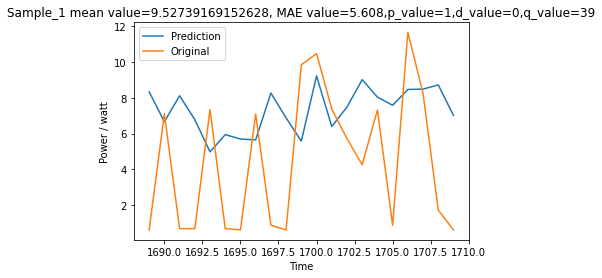

Model Diagonistics for Sample_2


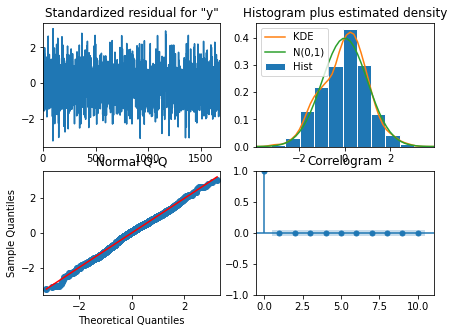

Sample3
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1690
Model:                 ARIMA(8, 0, 1)   Log Likelihood               -4871.868
Date:                Thu, 24 Mar 2022   AIC                           9765.735
Time:                        09:23:49   BIC                           9825.492
Sample:                             0   HQIC                          9787.864
                               - 1690                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3672      0.856     10.939      0.000       7.689      11.046
ar.L1         -0.2926      0.122     -2.394      0.017      -0.532      -0.053
ar.L2         -0.2331      0.041     -5.653 

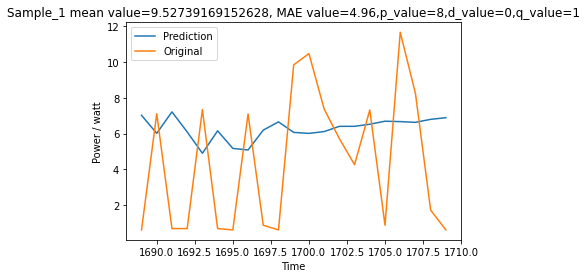

Model Diagonistics for Sample_2


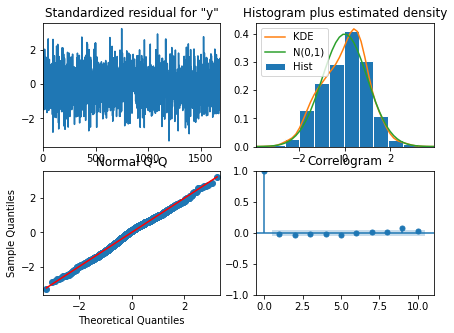

Sample3


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1690
Model:                ARIMA(8, 0, 39)   Log Likelihood               -4790.904
Date:                Thu, 24 Mar 2022   AIC                           9679.807
Time:                        09:25:49   BIC                           9945.999
Sample:                             0   HQIC                          9778.382
                               - 1690                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5092      0.992      9.588      0.000       7.565      11.453
ar.L1          0.2735      1.505      0.182      0.856      -2.677       3.224
ar.L2          0.0724      0.848      0.085      0.9

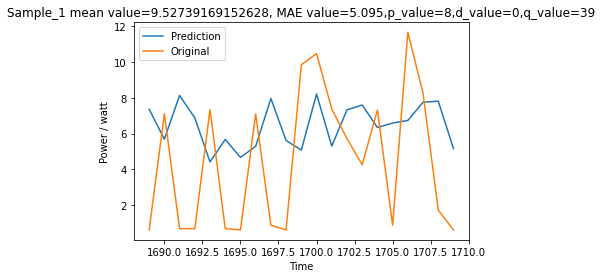

Model Diagonistics for Sample_2


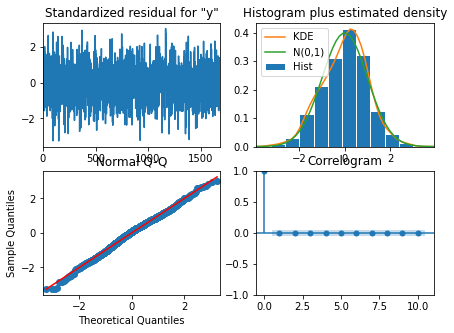

Sample3
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1690
Model:                ARIMA(10, 0, 1)   Log Likelihood               -4862.192
Date:                Thu, 24 Mar 2022   AIC                           9750.385
Time:                        09:25:52   BIC                           9821.007
Sample:                             0   HQIC                          9776.537
                               - 1690                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3216      0.984      9.473      0.000       7.393      11.250
ar.L1         -0.0831      0.196     -0.423      0.672      -0.468       0.302
ar.L2         -0.3133      0.053     -5.926 

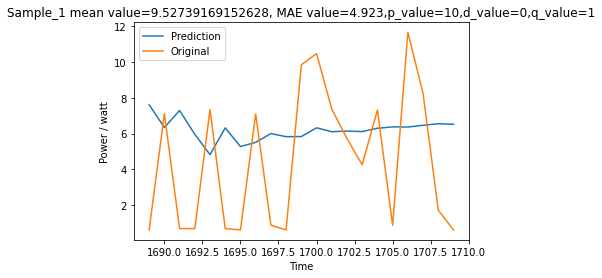

Model Diagonistics for Sample_2


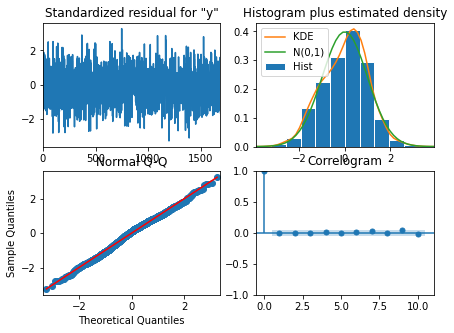

Sample3


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1690
Model:               ARIMA(10, 0, 39)   Log Likelihood               -4790.011
Date:                Thu, 24 Mar 2022   AIC                           9682.022
Time:                        09:27:55   BIC                           9959.078
Sample:                             0   HQIC                          9784.619
                               - 1690                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5111      0.840     11.322      0.000       7.865      11.158
ar.L1          0.3940      0.531      0.743      0.458      -0.646       1.434
ar.L2         -0.2343      0.400     -0.585      0.5

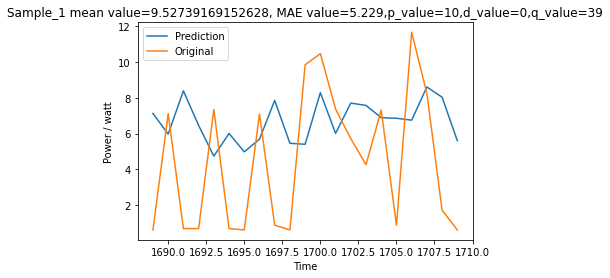

Model Diagonistics for Sample_2


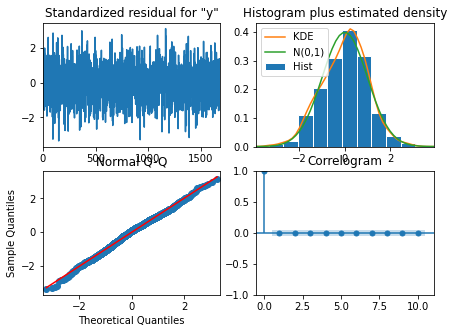

In [7]:
arima_score = {'sample': [], 'mean_score': [], 'MAE_score': [], 'p': [], 'd': [], 'q': []}
# Manually idendified possible p and q values for the 3 datasets 
sample_1_p = [5, 10]
sample_2_p = [3, 7, 15]
sample_3_p = [1, 8, 10]
sample_1_q = [13, 16]
sample_2_q = [3, 9]
sample_3_q = [1, 39]
arima_pram = {'0': [sample_1_p, sample_1_q, 0],'1': [sample_2_p, sample_2_q, 0], '2': [sample_3_p, sample_3_q, 0]}
for i, j in arima_pram.items():
    # Divide the dataset in train and test
    arima_train = pd.DataFrame(norm_df[int(i)]['y'][:-20].copy())
    arima_test = pd.DataFrame(norm_df[int(i)]['y'][-21:].copy())
    for m in j[0]:
        for n in j[1]:
            print('Sample{}'.format(int(i)+1))
            # Initialize the ARIMA model using p,d,q parameters
            model = sm.tsa.ARIMA(arima_train['y'],order = (m, j[2], n))
            model = model.fit()
            print(model.summary()) # print the model summary
            # forcast using the trained model
            pred = model.predict(start=arima_test.index[0], end=arima_test.index[-1])
            # Calculate the mean absolute error and mean error for the sample
            mae_score = MAE(arima_test, pred)
            mean_score = arima_train['y'].mean()
            # update the dictionary with the parameters and scores
            sample_name = 'Sample_{}'.format(int(i)+1)
            arima_score['sample'].append(sample_name)
            arima_score['mean_score'].append(mean_score)
            arima_score['MAE_score'].append(mae_score)
            arima_score['p'].append(m)
            arima_score['d'].append(j[1])
            arima_score['q'].append(n)
            # plot the original and predicted datapoints
            plt.plot(arima_test.index, pred, label='Prediction')
            plt.plot(arima_test.index, arima_train['y'][-21:], label='Original')
            plt.title('Sample_1 mean value={y}, MAE value={z},p_value={a},d_value={b},q_value={c}'.format(y=mean_score,z=mae_score,a=m,b=0,c=n))
            plt.legend(loc="upper left")
            plt.xlabel('Time')
            plt.ylabel('Power / watt')
            plt.show()
            print('Model Diagonistics for Sample_{}'.format(i))
            # check the model reliability
            model.plot_diagnostics(figsize=(7, 5))
            plt.show()

# AutoARIMA and SARIMAX

sample 1


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


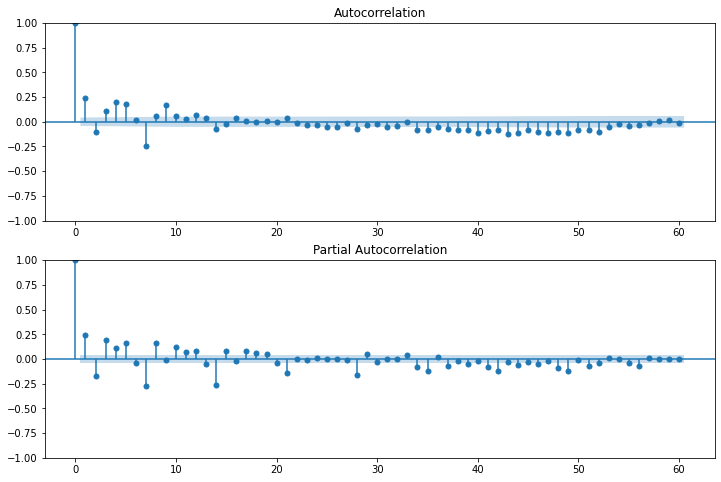

C:\Users\babal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2130
Model:             SARIMAX(3, 0, 2)x(1, 0, 2, 7)   Log Likelihood               -5960.323
Date:                           Thu, 24 Mar 2022   AIC                          11938.646
Time:                                   09:29:51   BIC                          11989.621
Sample:                                        0   HQIC                         11957.303
                                          - 2130                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8829      0.065     13.656      0.000       0.756       1.010
ar.L2         -0.2969      0.079     -3.740

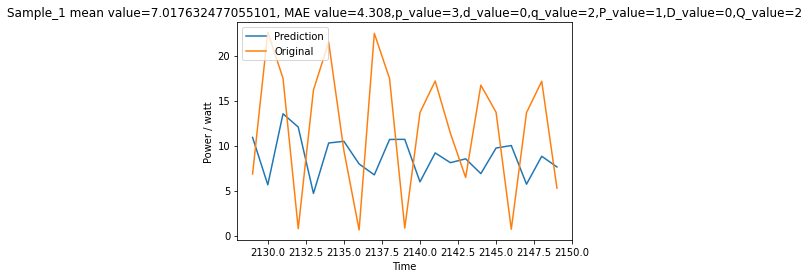

Model Diagonistics for Sample_0


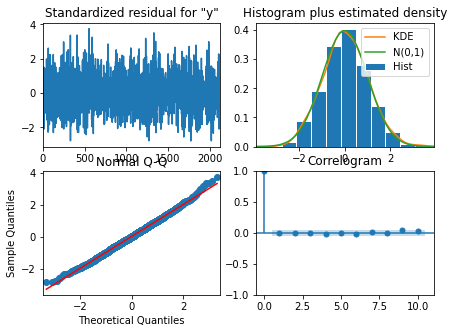

sample 2


C:\Users\babal\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


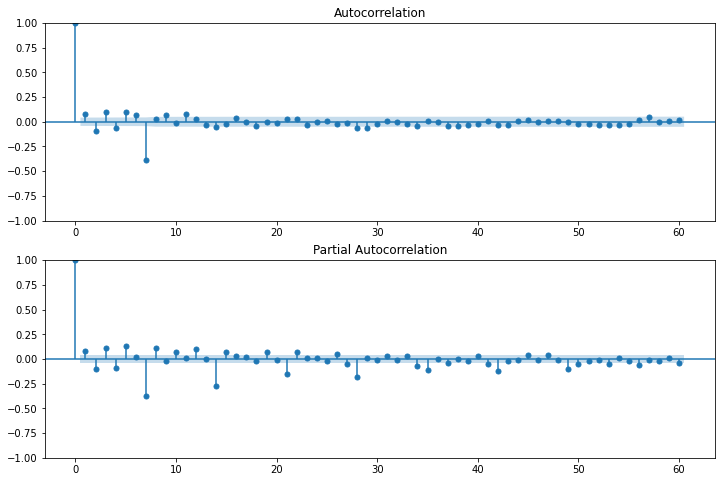

In [ ]:
sarima_score = {'sample': [], 'mean_score': [], 'MAE_score': [], 'p': [], 'd': [], 'q':[], 'P': [], 'D': [], 'Q': [], 'S':[]}
for i in range(3):
    # Divide the dataset in train and test
    arima_train = pd.DataFrame(norm_df[int(i)]['y'][:-20].copy())
    arima_test = pd.DataFrame(norm_df[int(i)]['y'][-21:].copy())
    print('sample {}'.format(i+1))
    # Shift the dataset based on its seasonality
    norm_df[i]['y_7_diff'] = norm_df[i]['y'] - norm_df[i]['y'].shift(7)
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(norm_df[i]['y_7_diff'].dropna(), ax=ax1, lags=60) # plot the autocorrelation
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(norm_df[i]['y_7_diff'].dropna(), ax=ax2, lags=60) # plot the partial autocorrelation
    # plt.savefig('sample_0_correlation_arima.png')
    plt.show()
    # Initialize the AutoARIMA model
    model = pm.auto_arima(arima_train, seasonal=True, m=7, stationary=True,error_action='ignore', suppress_warnings=True)
    # Extract the optimal order and seasonal order from the auto ARIMA
    get_parametes = model.get_params() # Get all parameters from model in a dictionary
    order_aa = get_parametes['order']
    seasonal_order_aa = get_parametes['seasonal_order']
    # Initialize the SARIMAX model with the parameters obtained from the auto ARIMA
    model = sm.tsa.statespace.SARIMAX(arima_train['y'], order=order_aa, seasonal_order=seasonal_order_aa)
    model = model.fit()
    print(model.summary()) # print the model summary
    # forcast using the trained model
    pred = model.predict(start=arima_test.index[0], end=arima_test.index[-1])
    # Calculate the mean absolute error and mean error for the sample
    mae_score = MAE(arima_test, pred)
    mean_score = arima_train['y'].mean()
    # update the dictionary with the parameters and scores
    sample_name = 'Sample_{}'.format(int(i)+1)
    sarima_score['sample'].append(sample_name)
    sarima_score['mean_score'].append(mean_score)
    sarima_score['MAE_score'].append(mae_score)
    sarima_score['p'].append(order_aa[0])
    sarima_score['d'].append(order_aa[1])
    sarima_score['q'].append(order_aa[2])
    sarima_score['P'].append(seasonal_order_aa[0])
    sarima_score['D'].append(seasonal_order_aa[1])
    sarima_score['Q'].append(seasonal_order_aa[2])
    # plot the original and predicted datapoints
    plt.plot(arima_test.index, pred, label='Prediction')
    plt.plot(arima_test.index, arima_train['y'][-21:], label='Original')
    plt.title('Sample_{g} mean value={y}, MAE value={z},p_value={a},d_value={b},q_value={c},P_value={d},D_value={e},Q_value={f}'.format(y=mean_score,z=mae_score,a=order_aa[0],b=order_aa[1],c=order_aa[2],d=seasonal_order_aa[0],e=seasonal_order_aa[1],f=seasonal_order_aa[2],g=i+1))
    plt.legend(loc="upper left")
    plt.xlabel('Time')
    plt.ylabel('Power / watt')
    plt.show()
    print('Model Diagonistics for Sample_{}'.format(i))
    # check the model reliability with error residual
    model.plot_diagnostics(figsize=(7, 5))
    plt.show()

# LSTM

In [8]:
def lstm_fun(n=50, m=None):
    """
        Method Name: lstm_fun
        Description: This function create the LSTM layer later will be used to train the model.
        Output: model
    """ 
    model = Sequential()
    model.add(LSTM(n, return_sequences=True, input_shape=(m, 1)))
    model.add(LSTM(n, return_sequences=True))
    model.add(LSTM(n))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=tf.keras.metrics.RootMeanSquaredError())
    return model
def create_dataset(dataset, time_step=None):
    """
        Method Name: create_dataset
        Description: This function create the LSTM layer later will be used to train the model.
        Output: array,array
    """ 
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset.iloc[i:(i+time_step), 0] 
        b=dataset.iloc[i + time_step, 0]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

Epoch 1/1000
22/22 [==============================] - 9s 228ms/step - loss: 42.7936 - root_mean_squared_error: 6.5417 - val_loss: 33.7197 - val_root_mean_squared_error: 5.8069
Epoch 2/1000
22/22 [==============================] - 4s 168ms/step - loss: 28.1418 - root_mean_squared_error: 5.3049 - val_loss: 33.3532 - val_root_mean_squared_error: 5.7752
Epoch 3/1000
22/22 [==============================] - 4s 164ms/step - loss: 27.4892 - root_mean_squared_error: 5.2430 - val_loss: 32.1635 - val_root_mean_squared_error: 5.6713
Epoch 4/1000
22/22 [==============================] - 4s 167ms/step - loss: 24.9015 - root_mean_squared_error: 4.9901 - val_loss: 26.3207 - val_root_mean_squared_error: 5.1304
Epoch 5/1000
22/22 [==============================] - 4s 162ms/step - loss: 20.4573 - root_mean_squared_error: 4.5230 - val_loss: 22.4576 - val_root_mean_squared_error: 4.7389
Epoch 6/1000
22/22 [==============================] - 4s 161ms/step - loss: 18.6958 - root_mean_squared_error: 4.3239 - 

22/22 [==============================] - 3s 159ms/step - loss: 13.4771 - root_mean_squared_error: 3.6711 - val_loss: 18.0889 - val_root_mean_squared_error: 4.2531
Epoch 48/1000
22/22 [==============================] - 4s 161ms/step - loss: 13.1954 - root_mean_squared_error: 3.6326 - val_loss: 18.4178 - val_root_mean_squared_error: 4.2916
Epoch 49/1000
22/22 [==============================] - 4s 162ms/step - loss: 13.2432 - root_mean_squared_error: 3.6391 - val_loss: 17.3788 - val_root_mean_squared_error: 4.1688
Epoch 50/1000
22/22 [==============================] - 4s 161ms/step - loss: 12.8251 - root_mean_squared_error: 3.5812 - val_loss: 17.6337 - val_root_mean_squared_error: 4.1992
Epoch 51/1000
22/22 [==============================] - 4s 161ms/step - loss: 13.2917 - root_mean_squared_error: 3.6458 - val_loss: 18.4039 - val_root_mean_squared_error: 4.2900
Epoch 52/1000
22/22 [==============================] - 4s 162ms/step - loss: 13.0959 - root_mean_squared_error: 3.6188 - val_loss

22/22 [==============================] - 4s 162ms/step - loss: 8.7807 - root_mean_squared_error: 2.9632 - val_loss: 16.3576 - val_root_mean_squared_error: 4.0444
Epoch 94/1000
22/22 [==============================] - 4s 163ms/step - loss: 8.5475 - root_mean_squared_error: 2.9236 - val_loss: 18.5065 - val_root_mean_squared_error: 4.3019
Epoch 95/1000
22/22 [==============================] - 4s 161ms/step - loss: 8.3997 - root_mean_squared_error: 2.8982 - val_loss: 16.9501 - val_root_mean_squared_error: 4.1171
Epoch 96/1000
22/22 [==============================] - 4s 161ms/step - loss: 8.2489 - root_mean_squared_error: 2.8721 - val_loss: 17.2894 - val_root_mean_squared_error: 4.1581
Epoch 97/1000
22/22 [==============================] - 3s 159ms/step - loss: 8.2267 - root_mean_squared_error: 2.8682 - val_loss: 17.4901 - val_root_mean_squared_error: 4.1821
Epoch 98/1000
22/22 [==============================] - 3s 159ms/step - loss: 8.3434 - root_mean_squared_error: 2.8885 - val_loss: 16.3

22/22 [==============================] - 4s 188ms/step - loss: 4.6329 - root_mean_squared_error: 2.1524 - val_loss: 18.3250 - val_root_mean_squared_error: 4.2808
Epoch 140/1000
22/22 [==============================] - 4s 191ms/step - loss: 4.3156 - root_mean_squared_error: 2.0774 - val_loss: 19.7705 - val_root_mean_squared_error: 4.4464
Epoch 141/1000
22/22 [==============================] - 4s 188ms/step - loss: 4.1095 - root_mean_squared_error: 2.0272 - val_loss: 18.9196 - val_root_mean_squared_error: 4.3497
Epoch 142/1000
22/22 [==============================] - 4s 187ms/step - loss: 4.2732 - root_mean_squared_error: 2.0672 - val_loss: 18.9289 - val_root_mean_squared_error: 4.3507
Epoch 143/1000
22/22 [==============================] - 4s 188ms/step - loss: 4.3418 - root_mean_squared_error: 2.0837 - val_loss: 19.2768 - val_root_mean_squared_error: 4.3905
Epoch 144/1000
22/22 [==============================] - 4s 188ms/step - loss: 3.8377 - root_mean_squared_error: 1.9590 - val_loss:

22/22 [==============================] - 4s 204ms/step - loss: 1.7149 - root_mean_squared_error: 1.3095 - val_loss: 23.2879 - val_root_mean_squared_error: 4.8257
Epoch 186/1000
22/22 [==============================] - 5s 222ms/step - loss: 1.8825 - root_mean_squared_error: 1.3721 - val_loss: 23.9775 - val_root_mean_squared_error: 4.8967
Epoch 187/1000
22/22 [==============================] - 4s 197ms/step - loss: 1.8433 - root_mean_squared_error: 1.3577 - val_loss: 22.9004 - val_root_mean_squared_error: 4.7854
Epoch 188/1000
22/22 [==============================] - 4s 206ms/step - loss: 1.6970 - root_mean_squared_error: 1.3027 - val_loss: 24.0352 - val_root_mean_squared_error: 4.9026
Epoch 189/1000
22/22 [==============================] - 5s 213ms/step - loss: 1.8974 - root_mean_squared_error: 1.3775 - val_loss: 23.7245 - val_root_mean_squared_error: 4.8708
Epoch 190/1000
22/22 [==============================] - 4s 189ms/step - loss: 1.6487 - root_mean_squared_error: 1.2840 - val_loss:

22/22 [==============================] - 4s 190ms/step - loss: 0.9818 - root_mean_squared_error: 0.9909 - val_loss: 24.3673 - val_root_mean_squared_error: 4.9363
Epoch 232/1000
22/22 [==============================] - 4s 189ms/step - loss: 0.8308 - root_mean_squared_error: 0.9115 - val_loss: 25.0386 - val_root_mean_squared_error: 5.0039
Epoch 233/1000
22/22 [==============================] - 4s 192ms/step - loss: 0.7281 - root_mean_squared_error: 0.8533 - val_loss: 24.7145 - val_root_mean_squared_error: 4.9714
Epoch 234/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.7247 - root_mean_squared_error: 0.8513 - val_loss: 24.8874 - val_root_mean_squared_error: 4.9887
Epoch 235/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.7242 - root_mean_squared_error: 0.8510 - val_loss: 25.8602 - val_root_mean_squared_error: 5.0853
Epoch 236/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.8423 - root_mean_squared_error: 0.9178 - val_loss:

22/22 [==============================] - 4s 189ms/step - loss: 0.4483 - root_mean_squared_error: 0.6695 - val_loss: 24.5180 - val_root_mean_squared_error: 4.9516
Epoch 278/1000
22/22 [==============================] - 4s 191ms/step - loss: 0.4954 - root_mean_squared_error: 0.7038 - val_loss: 24.6605 - val_root_mean_squared_error: 4.9659
Epoch 279/1000
22/22 [==============================] - 4s 189ms/step - loss: 0.4793 - root_mean_squared_error: 0.6923 - val_loss: 25.5780 - val_root_mean_squared_error: 5.0575
Epoch 280/1000
22/22 [==============================] - 4s 189ms/step - loss: 0.4096 - root_mean_squared_error: 0.6400 - val_loss: 24.6455 - val_root_mean_squared_error: 4.9644
Epoch 281/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.6838 - root_mean_squared_error: 0.8269 - val_loss: 24.7817 - val_root_mean_squared_error: 4.9781
Epoch 282/1000
22/22 [==============================] - 4s 188ms/step - loss: 0.8431 - root_mean_squared_error: 0.9182 - val_loss:

22/22 [==============================] - 4s 197ms/step - loss: 0.5713 - root_mean_squared_error: 0.7559 - val_loss: 24.9836 - val_root_mean_squared_error: 4.9984
Epoch 324/1000
22/22 [==============================] - 4s 199ms/step - loss: 0.5598 - root_mean_squared_error: 0.7482 - val_loss: 24.6273 - val_root_mean_squared_error: 4.9626
Epoch 325/1000
22/22 [==============================] - 4s 196ms/step - loss: 0.5416 - root_mean_squared_error: 0.7359 - val_loss: 24.4566 - val_root_mean_squared_error: 4.9454
Epoch 326/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.5182 - root_mean_squared_error: 0.7198 - val_loss: 25.0316 - val_root_mean_squared_error: 5.0032
Epoch 327/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.4592 - root_mean_squared_error: 0.6776 - val_loss: 24.2486 - val_root_mean_squared_error: 4.9243
Epoch 328/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.6553 - root_mean_squared_error: 0.8095 - val_loss:

22/22 [==============================] - 4s 196ms/step - loss: 0.3373 - root_mean_squared_error: 0.5808 - val_loss: 25.0880 - val_root_mean_squared_error: 5.0088
Epoch 370/1000
22/22 [==============================] - 4s 196ms/step - loss: 0.3384 - root_mean_squared_error: 0.5817 - val_loss: 24.0446 - val_root_mean_squared_error: 4.9035
Epoch 371/1000
22/22 [==============================] - 4s 192ms/step - loss: 0.3194 - root_mean_squared_error: 0.5651 - val_loss: 24.1491 - val_root_mean_squared_error: 4.9142
Epoch 372/1000
22/22 [==============================] - 4s 198ms/step - loss: 0.2097 - root_mean_squared_error: 0.4580 - val_loss: 24.5655 - val_root_mean_squared_error: 4.9564
Epoch 373/1000
22/22 [==============================] - 4s 199ms/step - loss: 0.1973 - root_mean_squared_error: 0.4441 - val_loss: 24.3006 - val_root_mean_squared_error: 4.9296
Epoch 374/1000
22/22 [==============================] - 4s 198ms/step - loss: 0.1889 - root_mean_squared_error: 0.4346 - val_loss:

22/22 [==============================] - 4s 190ms/step - loss: 0.2514 - root_mean_squared_error: 0.5014 - val_loss: 23.8804 - val_root_mean_squared_error: 4.8868
Epoch 416/1000
22/22 [==============================] - 4s 191ms/step - loss: 0.2027 - root_mean_squared_error: 0.4503 - val_loss: 24.0237 - val_root_mean_squared_error: 4.9014
Epoch 417/1000
22/22 [==============================] - 4s 195ms/step - loss: 0.1957 - root_mean_squared_error: 0.4424 - val_loss: 24.0074 - val_root_mean_squared_error: 4.8997
Epoch 418/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.1874 - root_mean_squared_error: 0.4329 - val_loss: 23.5602 - val_root_mean_squared_error: 4.8539
Epoch 419/1000
22/22 [==============================] - 4s 194ms/step - loss: 0.1965 - root_mean_squared_error: 0.4432 - val_loss: 24.4062 - val_root_mean_squared_error: 4.9403
Epoch 420/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.3557 - root_mean_squared_error: 0.5964 - val_loss:

22/22 [==============================] - 4s 194ms/step - loss: 0.0655 - root_mean_squared_error: 0.2560 - val_loss: 21.8376 - val_root_mean_squared_error: 4.6731
Epoch 462/1000
22/22 [==============================] - 4s 191ms/step - loss: 0.0625 - root_mean_squared_error: 0.2499 - val_loss: 21.6272 - val_root_mean_squared_error: 4.6505
Epoch 463/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.0560 - root_mean_squared_error: 0.2365 - val_loss: 21.6550 - val_root_mean_squared_error: 4.6535
Epoch 464/1000
22/22 [==============================] - 4s 191ms/step - loss: 0.0518 - root_mean_squared_error: 0.2276 - val_loss: 21.7265 - val_root_mean_squared_error: 4.6612
Epoch 465/1000
22/22 [==============================] - 4s 194ms/step - loss: 0.0556 - root_mean_squared_error: 0.2357 - val_loss: 21.8047 - val_root_mean_squared_error: 4.6696
Epoch 466/1000
22/22 [==============================] - 4s 192ms/step - loss: 0.0542 - root_mean_squared_error: 0.2328 - val_loss:

22/22 [==============================] - 4s 191ms/step - loss: 0.1322 - root_mean_squared_error: 0.3637 - val_loss: 21.1529 - val_root_mean_squared_error: 4.5992
Epoch 508/1000
22/22 [==============================] - 4s 192ms/step - loss: 0.3227 - root_mean_squared_error: 0.5681 - val_loss: 21.8310 - val_root_mean_squared_error: 4.6724
Epoch 509/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.3698 - root_mean_squared_error: 0.6081 - val_loss: 21.7468 - val_root_mean_squared_error: 4.6633
Epoch 510/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.6549 - root_mean_squared_error: 0.8093 - val_loss: 20.4829 - val_root_mean_squared_error: 4.5258
Epoch 511/1000
22/22 [==============================] - 4s 190ms/step - loss: 2.2695 - root_mean_squared_error: 1.5065 - val_loss: 21.3203 - val_root_mean_squared_error: 4.6174
Epoch 512/1000
22/22 [==============================] - 4s 192ms/step - loss: 3.0475 - root_mean_squared_error: 1.7457 - val_loss:

22/22 [==============================] - 4s 190ms/step - loss: 0.0116 - root_mean_squared_error: 0.1079 - val_loss: 20.9456 - val_root_mean_squared_error: 4.5766
Epoch 554/1000
22/22 [==============================] - 4s 191ms/step - loss: 0.0114 - root_mean_squared_error: 0.1066 - val_loss: 20.9204 - val_root_mean_squared_error: 4.5739
Epoch 555/1000
22/22 [==============================] - 4s 189ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 20.7884 - val_root_mean_squared_error: 4.5594
Epoch 556/1000
22/22 [==============================] - 4s 191ms/step - loss: 0.0156 - root_mean_squared_error: 0.1248 - val_loss: 20.9699 - val_root_mean_squared_error: 4.5793
Epoch 557/1000
22/22 [==============================] - 4s 194ms/step - loss: 0.0176 - root_mean_squared_error: 0.1328 - val_loss: 21.0022 - val_root_mean_squared_error: 4.5828
Epoch 558/1000
22/22 [==============================] - 4s 191ms/step - loss: 0.0146 - root_mean_squared_error: 0.1207 - val_loss:

22/22 [==============================] - 3s 160ms/step - loss: 0.1165 - root_mean_squared_error: 0.3413 - val_loss: 19.4941 - val_root_mean_squared_error: 4.4152
Epoch 600/1000
22/22 [==============================] - 4s 161ms/step - loss: 0.0844 - root_mean_squared_error: 0.2906 - val_loss: 19.6366 - val_root_mean_squared_error: 4.4313
Epoch 601/1000
22/22 [==============================] - 3s 160ms/step - loss: 0.1043 - root_mean_squared_error: 0.3229 - val_loss: 19.7778 - val_root_mean_squared_error: 4.4472
Epoch 602/1000
22/22 [==============================] - 4s 163ms/step - loss: 0.1131 - root_mean_squared_error: 0.3364 - val_loss: 19.7893 - val_root_mean_squared_error: 4.4485
Epoch 603/1000
22/22 [==============================] - 4s 165ms/step - loss: 0.0884 - root_mean_squared_error: 0.2973 - val_loss: 20.1569 - val_root_mean_squared_error: 4.4896
Epoch 604/1000
22/22 [==============================] - 4s 163ms/step - loss: 0.0900 - root_mean_squared_error: 0.3000 - val_loss:

22/22 [==============================] - 4s 167ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - val_loss: 19.8349 - val_root_mean_squared_error: 4.4536
Epoch 646/1000
22/22 [==============================] - 4s 163ms/step - loss: 0.0098 - root_mean_squared_error: 0.0989 - val_loss: 19.9473 - val_root_mean_squared_error: 4.4662
Epoch 647/1000
22/22 [==============================] - 4s 164ms/step - loss: 0.0088 - root_mean_squared_error: 0.0937 - val_loss: 19.9870 - val_root_mean_squared_error: 4.4707
Epoch 648/1000
22/22 [==============================] - 4s 163ms/step - loss: 0.0082 - root_mean_squared_error: 0.0908 - val_loss: 19.9056 - val_root_mean_squared_error: 4.4616
Epoch 649/1000
22/22 [==============================] - 4s 164ms/step - loss: 0.0075 - root_mean_squared_error: 0.0866 - val_loss: 19.8916 - val_root_mean_squared_error: 4.4600
Epoch 650/1000
22/22 [==============================] - 4s 162ms/step - loss: 0.0087 - root_mean_squared_error: 0.0935 - val_loss:

22/22 [==============================] - 4s 163ms/step - loss: 0.0298 - root_mean_squared_error: 0.1727 - val_loss: 18.4229 - val_root_mean_squared_error: 4.2922
Epoch 692/1000
22/22 [==============================] - 4s 162ms/step - loss: 0.0253 - root_mean_squared_error: 0.1590 - val_loss: 18.3972 - val_root_mean_squared_error: 4.2892
Epoch 693/1000
22/22 [==============================] - 4s 162ms/step - loss: 0.0237 - root_mean_squared_error: 0.1540 - val_loss: 18.4365 - val_root_mean_squared_error: 4.2938
Epoch 694/1000
22/22 [==============================] - 4s 162ms/step - loss: 0.0207 - root_mean_squared_error: 0.1440 - val_loss: 18.4034 - val_root_mean_squared_error: 4.2899
Epoch 695/1000
22/22 [==============================] - 4s 164ms/step - loss: 0.0198 - root_mean_squared_error: 0.1406 - val_loss: 18.3857 - val_root_mean_squared_error: 4.2879
Epoch 696/1000
22/22 [==============================] - 4s 164ms/step - loss: 0.0186 - root_mean_squared_error: 0.1365 - val_loss:

22/22 [==============================] - 5s 224ms/step - loss: 0.0121 - root_mean_squared_error: 0.1099 - val_loss: 18.4302 - val_root_mean_squared_error: 4.2930
Epoch 738/1000
22/22 [==============================] - 5s 247ms/step - loss: 0.0103 - root_mean_squared_error: 0.1013 - val_loss: 18.5411 - val_root_mean_squared_error: 4.3059
Epoch 739/1000
22/22 [==============================] - 5s 239ms/step - loss: 0.0087 - root_mean_squared_error: 0.0935 - val_loss: 18.4752 - val_root_mean_squared_error: 4.2983
Epoch 740/1000
22/22 [==============================] - 5s 238ms/step - loss: 0.0089 - root_mean_squared_error: 0.0944 - val_loss: 18.4481 - val_root_mean_squared_error: 4.2951
Epoch 741/1000
22/22 [==============================] - 5s 234ms/step - loss: 0.0071 - root_mean_squared_error: 0.0840 - val_loss: 18.5553 - val_root_mean_squared_error: 4.3076
Epoch 742/1000
22/22 [==============================] - 5s 241ms/step - loss: 0.0080 - root_mean_squared_error: 0.0892 - val_loss:

22/22 [==============================] - 5s 219ms/step - loss: 0.0403 - root_mean_squared_error: 0.2008 - val_loss: 18.0440 - val_root_mean_squared_error: 4.2478
Epoch 784/1000
22/22 [==============================] - 5s 222ms/step - loss: 0.0324 - root_mean_squared_error: 0.1801 - val_loss: 18.1761 - val_root_mean_squared_error: 4.2633
Epoch 785/1000
22/22 [==============================] - 5s 245ms/step - loss: 0.0315 - root_mean_squared_error: 0.1774 - val_loss: 18.2421 - val_root_mean_squared_error: 4.2711
Epoch 786/1000
22/22 [==============================] - 5s 238ms/step - loss: 0.0702 - root_mean_squared_error: 0.2649 - val_loss: 18.1621 - val_root_mean_squared_error: 4.2617
Epoch 787/1000
22/22 [==============================] - 5s 245ms/step - loss: 0.1069 - root_mean_squared_error: 0.3269 - val_loss: 18.4071 - val_root_mean_squared_error: 4.2904
Epoch 788/1000
22/22 [==============================] - 5s 231ms/step - loss: 0.0826 - root_mean_squared_error: 0.2874 - val_loss:

22/22 [==============================] - 5s 214ms/step - loss: 0.0030 - root_mean_squared_error: 0.0550 - val_loss: 18.9505 - val_root_mean_squared_error: 4.3532
Epoch 830/1000
22/22 [==============================] - 5s 249ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 18.8886 - val_root_mean_squared_error: 4.3461
Epoch 831/1000
22/22 [==============================] - 5s 231ms/step - loss: 0.0027 - root_mean_squared_error: 0.0515 - val_loss: 18.8903 - val_root_mean_squared_error: 4.3463
Epoch 832/1000
22/22 [==============================] - 5s 237ms/step - loss: 0.0025 - root_mean_squared_error: 0.0497 - val_loss: 18.8596 - val_root_mean_squared_error: 4.3428
Epoch 833/1000
22/22 [==============================] - 5s 231ms/step - loss: 0.0024 - root_mean_squared_error: 0.0490 - val_loss: 18.9155 - val_root_mean_squared_error: 4.3492
Epoch 834/1000
22/22 [==============================] - 6s 255ms/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_loss:

22/22 [==============================] - 5s 217ms/step - loss: 0.3389 - root_mean_squared_error: 0.5821 - val_loss: 18.6962 - val_root_mean_squared_error: 4.3239
Epoch 876/1000
22/22 [==============================] - 5s 245ms/step - loss: 0.2484 - root_mean_squared_error: 0.4984 - val_loss: 18.8406 - val_root_mean_squared_error: 4.3406
Epoch 877/1000
22/22 [==============================] - 6s 252ms/step - loss: 0.2163 - root_mean_squared_error: 0.4651 - val_loss: 18.8598 - val_root_mean_squared_error: 4.3428
Epoch 878/1000
22/22 [==============================] - 5s 245ms/step - loss: 0.2339 - root_mean_squared_error: 0.4837 - val_loss: 18.3688 - val_root_mean_squared_error: 4.2859
Epoch 879/1000
22/22 [==============================] - 5s 242ms/step - loss: 0.1573 - root_mean_squared_error: 0.3966 - val_loss: 18.8441 - val_root_mean_squared_error: 4.3410
Epoch 880/1000
22/22 [==============================] - 5s 236ms/step - loss: 0.1638 - root_mean_squared_error: 0.4047 - val_loss:

22/22 [==============================] - 5s 225ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 18.7274 - val_root_mean_squared_error: 4.3275
Epoch 922/1000
22/22 [==============================] - 6s 253ms/step - loss: 0.0032 - root_mean_squared_error: 0.0564 - val_loss: 18.7638 - val_root_mean_squared_error: 4.3317
Epoch 923/1000
22/22 [==============================] - 5s 245ms/step - loss: 0.0045 - root_mean_squared_error: 0.0670 - val_loss: 18.8393 - val_root_mean_squared_error: 4.3404
Epoch 924/1000
22/22 [==============================] - 5s 217ms/step - loss: 0.0042 - root_mean_squared_error: 0.0649 - val_loss: 18.7261 - val_root_mean_squared_error: 4.3274
Epoch 925/1000
22/22 [==============================] - 5s 232ms/step - loss: 0.0033 - root_mean_squared_error: 0.0577 - val_loss: 18.7576 - val_root_mean_squared_error: 4.3310
Epoch 926/1000
22/22 [==============================] - 5s 230ms/step - loss: 0.0034 - root_mean_squared_error: 0.0586 - val_loss:

22/22 [==============================] - 5s 234ms/step - loss: 0.1512 - root_mean_squared_error: 0.3889 - val_loss: 17.6432 - val_root_mean_squared_error: 4.2004
Epoch 968/1000
22/22 [==============================] - 5s 227ms/step - loss: 0.1758 - root_mean_squared_error: 0.4193 - val_loss: 17.5172 - val_root_mean_squared_error: 4.1854
Epoch 969/1000
22/22 [==============================] - 5s 241ms/step - loss: 0.1317 - root_mean_squared_error: 0.3629 - val_loss: 17.7707 - val_root_mean_squared_error: 4.2155
Epoch 970/1000
22/22 [==============================] - 5s 231ms/step - loss: 0.1006 - root_mean_squared_error: 0.3172 - val_loss: 17.7766 - val_root_mean_squared_error: 4.2162
Epoch 971/1000
22/22 [==============================] - 5s 230ms/step - loss: 0.1597 - root_mean_squared_error: 0.3996 - val_loss: 18.2638 - val_root_mean_squared_error: 4.2736
Epoch 972/1000
22/22 [==============================] - 6s 252ms/step - loss: 0.1075 - root_mean_squared_error: 0.3279 - val_loss:

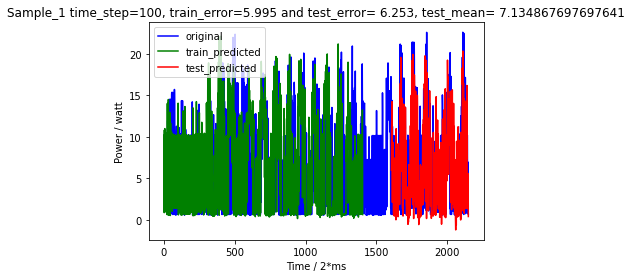

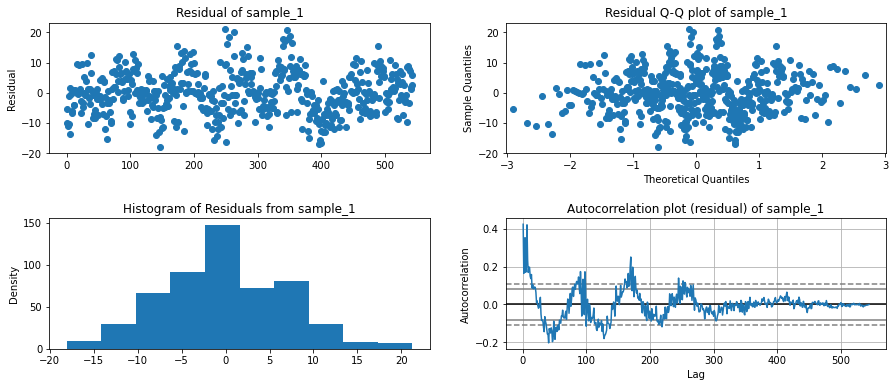

Epoch 1/1000
22/22 [==============================] - 17s 358ms/step - loss: 29.8850 - root_mean_squared_error: 5.4667 - val_loss: 19.0450 - val_root_mean_squared_error: 4.3641
Epoch 2/1000
22/22 [==============================] - 5s 243ms/step - loss: 19.2468 - root_mean_squared_error: 4.3871 - val_loss: 19.0520 - val_root_mean_squared_error: 4.3649
Epoch 3/1000
22/22 [==============================] - 5s 231ms/step - loss: 19.1284 - root_mean_squared_error: 4.3736 - val_loss: 19.0240 - val_root_mean_squared_error: 4.3616
Epoch 4/1000
22/22 [==============================] - 5s 239ms/step - loss: 19.1050 - root_mean_squared_error: 4.3709 - val_loss: 18.9923 - val_root_mean_squared_error: 4.3580
Epoch 5/1000
22/22 [==============================] - 5s 238ms/step - loss: 19.0618 - root_mean_squared_error: 4.3660 - val_loss: 18.7003 - val_root_mean_squared_error: 4.3244
Epoch 6/1000
22/22 [==============================] - 5s 243ms/step - loss: 18.7724 - root_mean_squared_error: 4.3327 -

22/22 [==============================] - 5s 225ms/step - loss: 12.8932 - root_mean_squared_error: 3.5907 - val_loss: 15.6380 - val_root_mean_squared_error: 3.9545
Epoch 48/1000
22/22 [==============================] - 4s 197ms/step - loss: 12.6821 - root_mean_squared_error: 3.5612 - val_loss: 16.5139 - val_root_mean_squared_error: 4.0637
Epoch 49/1000
22/22 [==============================] - 5s 228ms/step - loss: 12.6217 - root_mean_squared_error: 3.5527 - val_loss: 16.0481 - val_root_mean_squared_error: 4.0060
Epoch 50/1000
22/22 [==============================] - 5s 229ms/step - loss: 12.4894 - root_mean_squared_error: 3.5340 - val_loss: 16.0392 - val_root_mean_squared_error: 4.0049
Epoch 51/1000
22/22 [==============================] - 5s 216ms/step - loss: 12.2863 - root_mean_squared_error: 3.5052 - val_loss: 16.5598 - val_root_mean_squared_error: 4.0694
Epoch 52/1000
22/22 [==============================] - 5s 211ms/step - loss: 12.1184 - root_mean_squared_error: 3.4811 - val_loss

22/22 [==============================] - 5s 220ms/step - loss: 7.4045 - root_mean_squared_error: 2.7211 - val_loss: 21.7618 - val_root_mean_squared_error: 4.6650
Epoch 94/1000
22/22 [==============================] - 5s 222ms/step - loss: 7.1942 - root_mean_squared_error: 2.6822 - val_loss: 22.1037 - val_root_mean_squared_error: 4.7015
Epoch 95/1000
22/22 [==============================] - 5s 219ms/step - loss: 7.0150 - root_mean_squared_error: 2.6486 - val_loss: 22.3521 - val_root_mean_squared_error: 4.7278
Epoch 96/1000
22/22 [==============================] - 5s 216ms/step - loss: 7.0742 - root_mean_squared_error: 2.6597 - val_loss: 22.6166 - val_root_mean_squared_error: 4.7557
Epoch 97/1000
22/22 [==============================] - 5s 219ms/step - loss: 6.7456 - root_mean_squared_error: 2.5972 - val_loss: 23.4351 - val_root_mean_squared_error: 4.8410
Epoch 98/1000
22/22 [==============================] - 5s 215ms/step - loss: 6.9564 - root_mean_squared_error: 2.6375 - val_loss: 24.3

22/22 [==============================] - 5s 233ms/step - loss: 2.8101 - root_mean_squared_error: 1.6763 - val_loss: 26.8924 - val_root_mean_squared_error: 5.1858
Epoch 140/1000
22/22 [==============================] - 5s 250ms/step - loss: 2.9932 - root_mean_squared_error: 1.7301 - val_loss: 28.7242 - val_root_mean_squared_error: 5.3595
Epoch 141/1000
22/22 [==============================] - 5s 248ms/step - loss: 2.9277 - root_mean_squared_error: 1.7111 - val_loss: 29.2870 - val_root_mean_squared_error: 5.4117
Epoch 142/1000
22/22 [==============================] - 5s 236ms/step - loss: 2.6035 - root_mean_squared_error: 1.6136 - val_loss: 27.3124 - val_root_mean_squared_error: 5.2261
Epoch 143/1000
22/22 [==============================] - 5s 248ms/step - loss: 2.4301 - root_mean_squared_error: 1.5589 - val_loss: 30.1023 - val_root_mean_squared_error: 5.4866
Epoch 144/1000
22/22 [==============================] - 5s 248ms/step - loss: 2.6103 - root_mean_squared_error: 1.6157 - val_loss:

22/22 [==============================] - 5s 219ms/step - loss: 1.0820 - root_mean_squared_error: 1.0402 - val_loss: 31.2628 - val_root_mean_squared_error: 5.5913
Epoch 186/1000
22/22 [==============================] - 6s 253ms/step - loss: 1.1103 - root_mean_squared_error: 1.0537 - val_loss: 31.2978 - val_root_mean_squared_error: 5.5944
Epoch 187/1000
22/22 [==============================] - 5s 230ms/step - loss: 1.0049 - root_mean_squared_error: 1.0024 - val_loss: 31.3173 - val_root_mean_squared_error: 5.5962
Epoch 188/1000
22/22 [==============================] - 5s 224ms/step - loss: 0.8507 - root_mean_squared_error: 0.9223 - val_loss: 31.8881 - val_root_mean_squared_error: 5.6470
Epoch 189/1000
22/22 [==============================] - 5s 248ms/step - loss: 0.8211 - root_mean_squared_error: 0.9062 - val_loss: 31.0020 - val_root_mean_squared_error: 5.5679
Epoch 190/1000
22/22 [==============================] - 5s 221ms/step - loss: 0.8060 - root_mean_squared_error: 0.8978 - val_loss:

22/22 [==============================] - 5s 248ms/step - loss: 0.3885 - root_mean_squared_error: 0.6233 - val_loss: 30.4351 - val_root_mean_squared_error: 5.5168
Epoch 232/1000
22/22 [==============================] - 5s 249ms/step - loss: 0.4623 - root_mean_squared_error: 0.6799 - val_loss: 31.2715 - val_root_mean_squared_error: 5.5921
Epoch 233/1000
22/22 [==============================] - 5s 241ms/step - loss: 0.4489 - root_mean_squared_error: 0.6700 - val_loss: 28.9933 - val_root_mean_squared_error: 5.3845
Epoch 234/1000
22/22 [==============================] - 5s 226ms/step - loss: 0.4096 - root_mean_squared_error: 0.6400 - val_loss: 29.8294 - val_root_mean_squared_error: 5.4616
Epoch 235/1000
22/22 [==============================] - 5s 233ms/step - loss: 0.4348 - root_mean_squared_error: 0.6594 - val_loss: 30.2104 - val_root_mean_squared_error: 5.4964
Epoch 236/1000
22/22 [==============================] - 6s 260ms/step - loss: 0.4200 - root_mean_squared_error: 0.6480 - val_loss:

22/22 [==============================] - 5s 224ms/step - loss: 0.1932 - root_mean_squared_error: 0.4395 - val_loss: 28.4585 - val_root_mean_squared_error: 5.3346
Epoch 278/1000
22/22 [==============================] - 5s 228ms/step - loss: 0.1893 - root_mean_squared_error: 0.4350 - val_loss: 28.8474 - val_root_mean_squared_error: 5.3710
Epoch 279/1000
22/22 [==============================] - 5s 225ms/step - loss: 0.1881 - root_mean_squared_error: 0.4337 - val_loss: 28.9186 - val_root_mean_squared_error: 5.3776
Epoch 280/1000
22/22 [==============================] - 5s 225ms/step - loss: 0.1590 - root_mean_squared_error: 0.3987 - val_loss: 28.5334 - val_root_mean_squared_error: 5.3417
Epoch 281/1000
22/22 [==============================] - 5s 220ms/step - loss: 0.1613 - root_mean_squared_error: 0.4016 - val_loss: 29.2094 - val_root_mean_squared_error: 5.4046
Epoch 282/1000
22/22 [==============================] - 5s 228ms/step - loss: 0.1565 - root_mean_squared_error: 0.3956 - val_loss:

22/22 [==============================] - 5s 217ms/step - loss: 0.1143 - root_mean_squared_error: 0.3381 - val_loss: 28.3072 - val_root_mean_squared_error: 5.3205
Epoch 324/1000
22/22 [==============================] - 5s 219ms/step - loss: 0.0985 - root_mean_squared_error: 0.3138 - val_loss: 27.9066 - val_root_mean_squared_error: 5.2827
Epoch 325/1000
22/22 [==============================] - 5s 224ms/step - loss: 0.0936 - root_mean_squared_error: 0.3059 - val_loss: 28.2985 - val_root_mean_squared_error: 5.3196
Epoch 326/1000
22/22 [==============================] - 5s 215ms/step - loss: 0.0949 - root_mean_squared_error: 0.3081 - val_loss: 27.8271 - val_root_mean_squared_error: 5.2751
Epoch 327/1000
22/22 [==============================] - 5s 218ms/step - loss: 0.1258 - root_mean_squared_error: 0.3547 - val_loss: 28.1392 - val_root_mean_squared_error: 5.3046
Epoch 328/1000
22/22 [==============================] - 5s 213ms/step - loss: 0.1218 - root_mean_squared_error: 0.3489 - val_loss:

22/22 [==============================] - 5s 227ms/step - loss: 1.0353 - root_mean_squared_error: 1.0175 - val_loss: 25.6418 - val_root_mean_squared_error: 5.0638
Epoch 370/1000
22/22 [==============================] - 5s 218ms/step - loss: 0.6192 - root_mean_squared_error: 0.7869 - val_loss: 24.8104 - val_root_mean_squared_error: 4.9810
Epoch 371/1000
22/22 [==============================] - 5s 221ms/step - loss: 0.4156 - root_mean_squared_error: 0.6447 - val_loss: 25.6139 - val_root_mean_squared_error: 5.0610
Epoch 372/1000
22/22 [==============================] - 5s 229ms/step - loss: 0.2798 - root_mean_squared_error: 0.5290 - val_loss: 25.2749 - val_root_mean_squared_error: 5.0274
Epoch 373/1000
22/22 [==============================] - 5s 219ms/step - loss: 0.2231 - root_mean_squared_error: 0.4723 - val_loss: 25.1230 - val_root_mean_squared_error: 5.0123
Epoch 374/1000
22/22 [==============================] - 5s 239ms/step - loss: 0.2058 - root_mean_squared_error: 0.4537 - val_loss:

22/22 [==============================] - 5s 225ms/step - loss: 0.0814 - root_mean_squared_error: 0.2853 - val_loss: 26.8199 - val_root_mean_squared_error: 5.1788
Epoch 416/1000
22/22 [==============================] - 5s 214ms/step - loss: 0.0765 - root_mean_squared_error: 0.2766 - val_loss: 26.9013 - val_root_mean_squared_error: 5.1866
Epoch 417/1000
22/22 [==============================] - 5s 226ms/step - loss: 0.0773 - root_mean_squared_error: 0.2781 - val_loss: 27.4112 - val_root_mean_squared_error: 5.2356
Epoch 418/1000
22/22 [==============================] - 5s 244ms/step - loss: 0.0725 - root_mean_squared_error: 0.2693 - val_loss: 26.8912 - val_root_mean_squared_error: 5.1857
Epoch 419/1000
22/22 [==============================] - 5s 239ms/step - loss: 0.1549 - root_mean_squared_error: 0.3935 - val_loss: 26.4399 - val_root_mean_squared_error: 5.1420
Epoch 420/1000
22/22 [==============================] - 5s 216ms/step - loss: 0.1216 - root_mean_squared_error: 0.3487 - val_loss:

22/22 [==============================] - 5s 236ms/step - loss: 0.6653 - root_mean_squared_error: 0.8157 - val_loss: 22.6384 - val_root_mean_squared_error: 4.7580
Epoch 462/1000
22/22 [==============================] - 5s 217ms/step - loss: 0.4674 - root_mean_squared_error: 0.6837 - val_loss: 23.0948 - val_root_mean_squared_error: 4.8057
Epoch 463/1000
22/22 [==============================] - 5s 222ms/step - loss: 0.3329 - root_mean_squared_error: 0.5769 - val_loss: 23.5556 - val_root_mean_squared_error: 4.8534
Epoch 464/1000
22/22 [==============================] - 5s 227ms/step - loss: 0.2224 - root_mean_squared_error: 0.4716 - val_loss: 23.2616 - val_root_mean_squared_error: 4.8230
Epoch 465/1000
22/22 [==============================] - 5s 221ms/step - loss: 0.1795 - root_mean_squared_error: 0.4237 - val_loss: 23.5809 - val_root_mean_squared_error: 4.8560
Epoch 466/1000
22/22 [==============================] - 5s 245ms/step - loss: 0.1556 - root_mean_squared_error: 0.3945 - val_loss:

22/22 [==============================] - 5s 229ms/step - loss: 0.0393 - root_mean_squared_error: 0.1982 - val_loss: 24.7830 - val_root_mean_squared_error: 4.9783
Epoch 508/1000
22/22 [==============================] - 5s 226ms/step - loss: 0.0533 - root_mean_squared_error: 0.2310 - val_loss: 24.4047 - val_root_mean_squared_error: 4.9401
Epoch 509/1000
22/22 [==============================] - 5s 225ms/step - loss: 0.0630 - root_mean_squared_error: 0.2509 - val_loss: 24.7634 - val_root_mean_squared_error: 4.9763
Epoch 510/1000
22/22 [==============================] - 5s 223ms/step - loss: 0.0657 - root_mean_squared_error: 0.2563 - val_loss: 24.5527 - val_root_mean_squared_error: 4.9551
Epoch 511/1000
22/22 [==============================] - 5s 231ms/step - loss: 0.0601 - root_mean_squared_error: 0.2451 - val_loss: 24.7499 - val_root_mean_squared_error: 4.9749
Epoch 512/1000
22/22 [==============================] - 5s 229ms/step - loss: 0.0564 - root_mean_squared_error: 0.2376 - val_loss:

22/22 [==============================] - 5s 248ms/step - loss: 0.1187 - root_mean_squared_error: 0.3445 - val_loss: 24.2282 - val_root_mean_squared_error: 4.9222
Epoch 554/1000
22/22 [==============================] - 5s 220ms/step - loss: 0.1039 - root_mean_squared_error: 0.3223 - val_loss: 24.4339 - val_root_mean_squared_error: 4.9431
Epoch 555/1000
22/22 [==============================] - 5s 229ms/step - loss: 0.1018 - root_mean_squared_error: 0.3190 - val_loss: 24.4661 - val_root_mean_squared_error: 4.9463
Epoch 556/1000
22/22 [==============================] - 5s 240ms/step - loss: 0.1198 - root_mean_squared_error: 0.3462 - val_loss: 23.5173 - val_root_mean_squared_error: 4.8495
Epoch 557/1000
22/22 [==============================] - 5s 246ms/step - loss: 0.1642 - root_mean_squared_error: 0.4052 - val_loss: 24.2293 - val_root_mean_squared_error: 4.9223
Epoch 558/1000
22/22 [==============================] - 5s 237ms/step - loss: 0.1832 - root_mean_squared_error: 0.4281 - val_loss:

22/22 [==============================] - 5s 207ms/step - loss: 0.0105 - root_mean_squared_error: 0.1027 - val_loss: 23.5892 - val_root_mean_squared_error: 4.8569
Epoch 600/1000
22/22 [==============================] - 4s 201ms/step - loss: 0.0105 - root_mean_squared_error: 0.1023 - val_loss: 23.3655 - val_root_mean_squared_error: 4.8338
Epoch 601/1000
22/22 [==============================] - 5s 211ms/step - loss: 0.0095 - root_mean_squared_error: 0.0976 - val_loss: 23.4947 - val_root_mean_squared_error: 4.8471
Epoch 602/1000
22/22 [==============================] - 4s 197ms/step - loss: 0.0093 - root_mean_squared_error: 0.0963 - val_loss: 23.5669 - val_root_mean_squared_error: 4.8546
Epoch 603/1000
22/22 [==============================] - 4s 198ms/step - loss: 0.0088 - root_mean_squared_error: 0.0936 - val_loss: 23.5769 - val_root_mean_squared_error: 4.8556
Epoch 604/1000
22/22 [==============================] - 4s 201ms/step - loss: 0.0083 - root_mean_squared_error: 0.0912 - val_loss:

22/22 [==============================] - 4s 195ms/step - loss: 0.0994 - root_mean_squared_error: 0.3153 - val_loss: 23.2719 - val_root_mean_squared_error: 4.8241
Epoch 646/1000
22/22 [==============================] - 4s 197ms/step - loss: 0.1650 - root_mean_squared_error: 0.4062 - val_loss: 23.3089 - val_root_mean_squared_error: 4.8279
Epoch 647/1000
22/22 [==============================] - 4s 196ms/step - loss: 0.1372 - root_mean_squared_error: 0.3705 - val_loss: 23.2087 - val_root_mean_squared_error: 4.8175
Epoch 648/1000
22/22 [==============================] - 4s 196ms/step - loss: 0.1113 - root_mean_squared_error: 0.3336 - val_loss: 23.5242 - val_root_mean_squared_error: 4.8502
Epoch 649/1000
22/22 [==============================] - 4s 195ms/step - loss: 0.0898 - root_mean_squared_error: 0.2996 - val_loss: 23.0902 - val_root_mean_squared_error: 4.8052
Epoch 650/1000
22/22 [==============================] - 4s 195ms/step - loss: 0.0815 - root_mean_squared_error: 0.2854 - val_loss:

22/22 [==============================] - 4s 191ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - val_loss: 23.0293 - val_root_mean_squared_error: 4.7989
Epoch 692/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.0051 - root_mean_squared_error: 0.0716 - val_loss: 23.0147 - val_root_mean_squared_error: 4.7974
Epoch 693/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.0058 - root_mean_squared_error: 0.0760 - val_loss: 22.9683 - val_root_mean_squared_error: 4.7925
Epoch 694/1000
22/22 [==============================] - 4s 193ms/step - loss: 0.0061 - root_mean_squared_error: 0.0784 - val_loss: 22.9725 - val_root_mean_squared_error: 4.7930
Epoch 695/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.0074 - root_mean_squared_error: 0.0858 - val_loss: 23.1496 - val_root_mean_squared_error: 4.8114
Epoch 696/1000
22/22 [==============================] - 4s 189ms/step - loss: 0.0073 - root_mean_squared_error: 0.0853 - val_loss:

22/22 [==============================] - 4s 192ms/step - loss: 0.0300 - root_mean_squared_error: 0.1733 - val_loss: 22.3953 - val_root_mean_squared_error: 4.7324
Epoch 738/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.0249 - root_mean_squared_error: 0.1579 - val_loss: 22.3644 - val_root_mean_squared_error: 4.7291
Epoch 739/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.0228 - root_mean_squared_error: 0.1510 - val_loss: 22.5317 - val_root_mean_squared_error: 4.7468
Epoch 740/1000
22/22 [==============================] - 4s 189ms/step - loss: 0.0176 - root_mean_squared_error: 0.1328 - val_loss: 22.1294 - val_root_mean_squared_error: 4.7042
Epoch 741/1000
22/22 [==============================] - 4s 189ms/step - loss: 0.0144 - root_mean_squared_error: 0.1199 - val_loss: 22.3444 - val_root_mean_squared_error: 4.7270
Epoch 742/1000
22/22 [==============================] - 4s 190ms/step - loss: 0.0111 - root_mean_squared_error: 0.1054 - val_loss:

22/22 [==============================] - 4s 197ms/step - loss: 0.4321 - root_mean_squared_error: 0.6573 - val_loss: 22.8366 - val_root_mean_squared_error: 4.7788
Epoch 784/1000
22/22 [==============================] - 4s 197ms/step - loss: 0.8265 - root_mean_squared_error: 0.9091 - val_loss: 21.2279 - val_root_mean_squared_error: 4.6074
Epoch 785/1000
22/22 [==============================] - 4s 196ms/step - loss: 1.9388 - root_mean_squared_error: 1.3924 - val_loss: 20.6912 - val_root_mean_squared_error: 4.5488
Epoch 786/1000
22/22 [==============================] - 4s 195ms/step - loss: 3.3378 - root_mean_squared_error: 1.8270 - val_loss: 20.2942 - val_root_mean_squared_error: 4.5049
Epoch 787/1000
22/22 [==============================] - 4s 197ms/step - loss: 2.5299 - root_mean_squared_error: 1.5906 - val_loss: 20.8743 - val_root_mean_squared_error: 4.5688
Epoch 788/1000
22/22 [==============================] - 4s 196ms/step - loss: 1.5215 - root_mean_squared_error: 1.2335 - val_loss:

22/22 [==============================] - 4s 200ms/step - loss: 0.0042 - root_mean_squared_error: 0.0651 - val_loss: 21.8577 - val_root_mean_squared_error: 4.6752
Epoch 830/1000
22/22 [==============================] - 4s 197ms/step - loss: 0.0045 - root_mean_squared_error: 0.0671 - val_loss: 21.8049 - val_root_mean_squared_error: 4.6696
Epoch 831/1000
22/22 [==============================] - 4s 196ms/step - loss: 0.0046 - root_mean_squared_error: 0.0675 - val_loss: 21.8502 - val_root_mean_squared_error: 4.6744
Epoch 832/1000
22/22 [==============================] - 4s 197ms/step - loss: 0.0049 - root_mean_squared_error: 0.0700 - val_loss: 21.8281 - val_root_mean_squared_error: 4.6721
Epoch 833/1000
22/22 [==============================] - 4s 200ms/step - loss: 0.0051 - root_mean_squared_error: 0.0717 - val_loss: 21.8201 - val_root_mean_squared_error: 4.6712
Epoch 834/1000
22/22 [==============================] - 4s 196ms/step - loss: 0.0042 - root_mean_squared_error: 0.0646 - val_loss:

22/22 [==============================] - 4s 199ms/step - loss: 0.0304 - root_mean_squared_error: 0.1744 - val_loss: 21.9611 - val_root_mean_squared_error: 4.6863
Epoch 876/1000
22/22 [==============================] - 4s 196ms/step - loss: 0.0319 - root_mean_squared_error: 0.1786 - val_loss: 21.7380 - val_root_mean_squared_error: 4.6624
Epoch 877/1000
22/22 [==============================] - 4s 197ms/step - loss: 0.0339 - root_mean_squared_error: 0.1841 - val_loss: 21.6457 - val_root_mean_squared_error: 4.6525
Epoch 878/1000
22/22 [==============================] - 4s 197ms/step - loss: 0.0423 - root_mean_squared_error: 0.2056 - val_loss: 22.1184 - val_root_mean_squared_error: 4.7030
Epoch 879/1000
22/22 [==============================] - 4s 197ms/step - loss: 0.0413 - root_mean_squared_error: 0.2031 - val_loss: 22.0988 - val_root_mean_squared_error: 4.7009
Epoch 880/1000
22/22 [==============================] - 4s 196ms/step - loss: 0.0372 - root_mean_squared_error: 0.1929 - val_loss:

22/22 [==============================] - 4s 197ms/step - loss: 0.1152 - root_mean_squared_error: 0.3395 - val_loss: 19.6790 - val_root_mean_squared_error: 4.4361
Epoch 922/1000
22/22 [==============================] - 4s 196ms/step - loss: 0.0858 - root_mean_squared_error: 0.2930 - val_loss: 19.9297 - val_root_mean_squared_error: 4.4643
Epoch 923/1000
22/22 [==============================] - 4s 196ms/step - loss: 0.0674 - root_mean_squared_error: 0.2596 - val_loss: 20.0465 - val_root_mean_squared_error: 4.4773
Epoch 924/1000
22/22 [==============================] - 4s 196ms/step - loss: 0.0550 - root_mean_squared_error: 0.2346 - val_loss: 19.9392 - val_root_mean_squared_error: 4.4653
Epoch 925/1000
22/22 [==============================] - 4s 196ms/step - loss: 0.0482 - root_mean_squared_error: 0.2194 - val_loss: 19.9089 - val_root_mean_squared_error: 4.4619
Epoch 926/1000
22/22 [==============================] - 4s 197ms/step - loss: 0.0415 - root_mean_squared_error: 0.2037 - val_loss:

22/22 [==============================] - 3s 154ms/step - loss: 0.0032 - root_mean_squared_error: 0.0563 - val_loss: 20.2813 - val_root_mean_squared_error: 4.5035
Epoch 968/1000
22/22 [==============================] - 3s 155ms/step - loss: 0.0029 - root_mean_squared_error: 0.0534 - val_loss: 20.3086 - val_root_mean_squared_error: 4.5065
Epoch 969/1000
22/22 [==============================] - 3s 156ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 20.3161 - val_root_mean_squared_error: 4.5073
Epoch 970/1000
22/22 [==============================] - 4s 170ms/step - loss: 0.0028 - root_mean_squared_error: 0.0529 - val_loss: 20.3328 - val_root_mean_squared_error: 4.5092
Epoch 971/1000
22/22 [==============================] - 4s 170ms/step - loss: 0.0028 - root_mean_squared_error: 0.0528 - val_loss: 20.2790 - val_root_mean_squared_error: 4.5032
Epoch 972/1000
22/22 [==============================] - 4s 172ms/step - loss: 0.0030 - root_mean_squared_error: 0.0550 - val_loss:

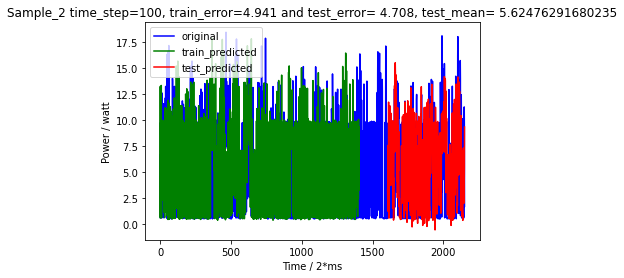

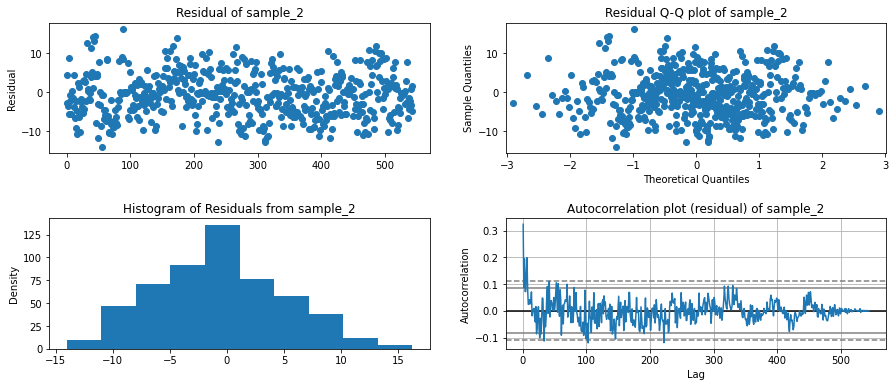

Epoch 1/1000
18/18 [==============================] - 9s 276ms/step - loss: 87.6665 - root_mean_squared_error: 9.3630 - val_loss: 42.0484 - val_root_mean_squared_error: 6.4845
Epoch 2/1000
18/18 [==============================] - 3s 195ms/step - loss: 43.2226 - root_mean_squared_error: 6.5744 - val_loss: 35.0106 - val_root_mean_squared_error: 5.9170
Epoch 3/1000
18/18 [==============================] - 4s 199ms/step - loss: 35.0697 - root_mean_squared_error: 5.9220 - val_loss: 36.8101 - val_root_mean_squared_error: 6.0671
Epoch 4/1000
18/18 [==============================] - 4s 199ms/step - loss: 34.2702 - root_mean_squared_error: 5.8541 - val_loss: 37.9201 - val_root_mean_squared_error: 6.1579
Epoch 5/1000
18/18 [==============================] - 4s 200ms/step - loss: 34.2436 - root_mean_squared_error: 5.8518 - val_loss: 38.0755 - val_root_mean_squared_error: 6.1705
Epoch 6/1000
18/18 [==============================] - 4s 200ms/step - loss: 34.2244 - root_mean_squared_error: 5.8502 - 

18/18 [==============================] - 3s 176ms/step - loss: 19.3733 - root_mean_squared_error: 4.4015 - val_loss: 18.2215 - val_root_mean_squared_error: 4.2687
Epoch 48/1000
18/18 [==============================] - 3s 175ms/step - loss: 19.3459 - root_mean_squared_error: 4.3984 - val_loss: 19.4547 - val_root_mean_squared_error: 4.4108
Epoch 49/1000
18/18 [==============================] - 3s 175ms/step - loss: 19.2607 - root_mean_squared_error: 4.3887 - val_loss: 18.4913 - val_root_mean_squared_error: 4.3002
Epoch 50/1000
18/18 [==============================] - 3s 175ms/step - loss: 19.2127 - root_mean_squared_error: 4.3832 - val_loss: 18.1131 - val_root_mean_squared_error: 4.2559
Epoch 51/1000
18/18 [==============================] - 3s 174ms/step - loss: 19.4566 - root_mean_squared_error: 4.4110 - val_loss: 19.0283 - val_root_mean_squared_error: 4.3621
Epoch 52/1000
18/18 [==============================] - 3s 176ms/step - loss: 18.8792 - root_mean_squared_error: 4.3450 - val_loss

18/18 [==============================] - 3s 161ms/step - loss: 12.1617 - root_mean_squared_error: 3.4874 - val_loss: 19.6153 - val_root_mean_squared_error: 4.4289
Epoch 94/1000
18/18 [==============================] - 3s 160ms/step - loss: 12.7514 - root_mean_squared_error: 3.5709 - val_loss: 17.1933 - val_root_mean_squared_error: 4.1465
Epoch 95/1000
18/18 [==============================] - 3s 159ms/step - loss: 11.5394 - root_mean_squared_error: 3.3970 - val_loss: 19.2988 - val_root_mean_squared_error: 4.3930
Epoch 96/1000
18/18 [==============================] - 3s 158ms/step - loss: 11.1214 - root_mean_squared_error: 3.3349 - val_loss: 19.0818 - val_root_mean_squared_error: 4.3683
Epoch 97/1000
18/18 [==============================] - 3s 159ms/step - loss: 10.7492 - root_mean_squared_error: 3.2786 - val_loss: 19.1120 - val_root_mean_squared_error: 4.3717
Epoch 98/1000
18/18 [==============================] - 3s 158ms/step - loss: 10.6139 - root_mean_squared_error: 3.2579 - val_loss

18/18 [==============================] - 3s 170ms/step - loss: 6.2282 - root_mean_squared_error: 2.4956 - val_loss: 24.7359 - val_root_mean_squared_error: 4.9735
Epoch 140/1000
18/18 [==============================] - 3s 177ms/step - loss: 5.5957 - root_mean_squared_error: 2.3655 - val_loss: 25.8157 - val_root_mean_squared_error: 5.0809
Epoch 141/1000
18/18 [==============================] - 3s 180ms/step - loss: 5.7318 - root_mean_squared_error: 2.3941 - val_loss: 25.9372 - val_root_mean_squared_error: 5.0929
Epoch 142/1000
18/18 [==============================] - 3s 172ms/step - loss: 5.7351 - root_mean_squared_error: 2.3948 - val_loss: 25.1639 - val_root_mean_squared_error: 5.0164
Epoch 143/1000
18/18 [==============================] - 3s 197ms/step - loss: 6.4155 - root_mean_squared_error: 2.5329 - val_loss: 25.0861 - val_root_mean_squared_error: 5.0086
Epoch 144/1000
18/18 [==============================] - 4s 237ms/step - loss: 6.3736 - root_mean_squared_error: 2.5246 - val_loss:

18/18 [==============================] - 3s 180ms/step - loss: 2.4680 - root_mean_squared_error: 1.5710 - val_loss: 33.3057 - val_root_mean_squared_error: 5.7711
Epoch 186/1000
18/18 [==============================] - 4s 201ms/step - loss: 3.4365 - root_mean_squared_error: 1.8538 - val_loss: 32.0974 - val_root_mean_squared_error: 5.6655
Epoch 187/1000
18/18 [==============================] - 3s 185ms/step - loss: 3.4751 - root_mean_squared_error: 1.8642 - val_loss: 32.8288 - val_root_mean_squared_error: 5.7296
Epoch 188/1000
18/18 [==============================] - 3s 178ms/step - loss: 2.8498 - root_mean_squared_error: 1.6881 - val_loss: 31.8826 - val_root_mean_squared_error: 5.6465
Epoch 189/1000
18/18 [==============================] - 4s 220ms/step - loss: 3.1428 - root_mean_squared_error: 1.7728 - val_loss: 31.4410 - val_root_mean_squared_error: 5.6072
Epoch 190/1000
18/18 [==============================] - 4s 224ms/step - loss: 2.9424 - root_mean_squared_error: 1.7153 - val_loss:

18/18 [==============================] - 4s 229ms/step - loss: 1.3819 - root_mean_squared_error: 1.1755 - val_loss: 35.0348 - val_root_mean_squared_error: 5.9190
Epoch 232/1000
18/18 [==============================] - 4s 248ms/step - loss: 1.9714 - root_mean_squared_error: 1.4041 - val_loss: 35.8623 - val_root_mean_squared_error: 5.9885
Epoch 233/1000
18/18 [==============================] - 5s 253ms/step - loss: 1.8978 - root_mean_squared_error: 1.3776 - val_loss: 34.0340 - val_root_mean_squared_error: 5.8339
Epoch 234/1000
18/18 [==============================] - 4s 239ms/step - loss: 1.6550 - root_mean_squared_error: 1.2865 - val_loss: 36.2920 - val_root_mean_squared_error: 6.0243
Epoch 235/1000
18/18 [==============================] - 4s 234ms/step - loss: 1.4928 - root_mean_squared_error: 1.2218 - val_loss: 35.1973 - val_root_mean_squared_error: 5.9327
Epoch 236/1000
18/18 [==============================] - 4s 238ms/step - loss: 1.4316 - root_mean_squared_error: 1.1965 - val_loss:

18/18 [==============================] - 3s 177ms/step - loss: 1.5237 - root_mean_squared_error: 1.2344 - val_loss: 34.5992 - val_root_mean_squared_error: 5.8821
Epoch 278/1000
18/18 [==============================] - 3s 177ms/step - loss: 0.9996 - root_mean_squared_error: 0.9998 - val_loss: 35.1274 - val_root_mean_squared_error: 5.9268
Epoch 279/1000
18/18 [==============================] - 3s 174ms/step - loss: 0.8857 - root_mean_squared_error: 0.9411 - val_loss: 36.8111 - val_root_mean_squared_error: 6.0672
Epoch 280/1000
18/18 [==============================] - 3s 175ms/step - loss: 0.7865 - root_mean_squared_error: 0.8868 - val_loss: 36.6616 - val_root_mean_squared_error: 6.0549
Epoch 281/1000
18/18 [==============================] - 3s 177ms/step - loss: 0.6928 - root_mean_squared_error: 0.8324 - val_loss: 35.9349 - val_root_mean_squared_error: 5.9946
Epoch 282/1000
18/18 [==============================] - 3s 177ms/step - loss: 0.6189 - root_mean_squared_error: 0.7867 - val_loss:

18/18 [==============================] - 3s 175ms/step - loss: 0.4830 - root_mean_squared_error: 0.6950 - val_loss: 36.1164 - val_root_mean_squared_error: 6.0097
Epoch 324/1000
18/18 [==============================] - 3s 177ms/step - loss: 0.4832 - root_mean_squared_error: 0.6951 - val_loss: 36.0857 - val_root_mean_squared_error: 6.0071
Epoch 325/1000
18/18 [==============================] - 3s 177ms/step - loss: 0.3910 - root_mean_squared_error: 0.6253 - val_loss: 36.3594 - val_root_mean_squared_error: 6.0299
Epoch 326/1000
18/18 [==============================] - 3s 175ms/step - loss: 0.4072 - root_mean_squared_error: 0.6381 - val_loss: 34.9415 - val_root_mean_squared_error: 5.9111
Epoch 327/1000
18/18 [==============================] - 3s 174ms/step - loss: 0.3305 - root_mean_squared_error: 0.5749 - val_loss: 35.8346 - val_root_mean_squared_error: 5.9862
Epoch 328/1000
18/18 [==============================] - 3s 176ms/step - loss: 0.2902 - root_mean_squared_error: 0.5387 - val_loss:

18/18 [==============================] - 3s 172ms/step - loss: 0.4634 - root_mean_squared_error: 0.6807 - val_loss: 35.3353 - val_root_mean_squared_error: 5.9444
Epoch 370/1000
18/18 [==============================] - 3s 169ms/step - loss: 0.3330 - root_mean_squared_error: 0.5771 - val_loss: 35.8773 - val_root_mean_squared_error: 5.9898
Epoch 371/1000
18/18 [==============================] - 3s 170ms/step - loss: 0.3168 - root_mean_squared_error: 0.5628 - val_loss: 35.6900 - val_root_mean_squared_error: 5.9741
Epoch 372/1000
18/18 [==============================] - 3s 174ms/step - loss: 0.3281 - root_mean_squared_error: 0.5728 - val_loss: 34.7615 - val_root_mean_squared_error: 5.8959
Epoch 373/1000
18/18 [==============================] - 4s 225ms/step - loss: 0.2692 - root_mean_squared_error: 0.5188 - val_loss: 35.3917 - val_root_mean_squared_error: 5.9491
Epoch 374/1000
18/18 [==============================] - 4s 225ms/step - loss: 0.2367 - root_mean_squared_error: 0.4866 - val_loss:

18/18 [==============================] - 3s 182ms/step - loss: 0.1439 - root_mean_squared_error: 0.3793 - val_loss: 33.1356 - val_root_mean_squared_error: 5.7564
Epoch 416/1000
18/18 [==============================] - 3s 176ms/step - loss: 0.1635 - root_mean_squared_error: 0.4043 - val_loss: 33.4983 - val_root_mean_squared_error: 5.7878
Epoch 417/1000
18/18 [==============================] - 4s 198ms/step - loss: 0.1409 - root_mean_squared_error: 0.3754 - val_loss: 33.4699 - val_root_mean_squared_error: 5.7853
Epoch 418/1000
18/18 [==============================] - 3s 181ms/step - loss: 0.1306 - root_mean_squared_error: 0.3614 - val_loss: 33.3859 - val_root_mean_squared_error: 5.7781
Epoch 419/1000
18/18 [==============================] - 3s 184ms/step - loss: 0.1151 - root_mean_squared_error: 0.3392 - val_loss: 34.0577 - val_root_mean_squared_error: 5.8359
Epoch 420/1000
18/18 [==============================] - 4s 217ms/step - loss: 0.0984 - root_mean_squared_error: 0.3136 - val_loss:

18/18 [==============================] - 3s 175ms/step - loss: 0.3407 - root_mean_squared_error: 0.5837 - val_loss: 34.2327 - val_root_mean_squared_error: 5.8509
Epoch 462/1000
18/18 [==============================] - 4s 209ms/step - loss: 0.4247 - root_mean_squared_error: 0.6517 - val_loss: 32.6941 - val_root_mean_squared_error: 5.7179
Epoch 463/1000
18/18 [==============================] - 3s 188ms/step - loss: 0.2819 - root_mean_squared_error: 0.5309 - val_loss: 33.7455 - val_root_mean_squared_error: 5.8091
Epoch 464/1000
18/18 [==============================] - 3s 190ms/step - loss: 0.1973 - root_mean_squared_error: 0.4442 - val_loss: 33.0556 - val_root_mean_squared_error: 5.7494
Epoch 465/1000
18/18 [==============================] - 3s 193ms/step - loss: 0.1795 - root_mean_squared_error: 0.4237 - val_loss: 33.4231 - val_root_mean_squared_error: 5.7813
Epoch 466/1000
18/18 [==============================] - 3s 180ms/step - loss: 0.1232 - root_mean_squared_error: 0.3510 - val_loss:

18/18 [==============================] - 4s 204ms/step - loss: 0.4672 - root_mean_squared_error: 0.6835 - val_loss: 33.3213 - val_root_mean_squared_error: 5.7725
Epoch 508/1000
18/18 [==============================] - 5s 264ms/step - loss: 0.4150 - root_mean_squared_error: 0.6442 - val_loss: 33.2713 - val_root_mean_squared_error: 5.7681
Epoch 509/1000
18/18 [==============================] - 3s 191ms/step - loss: 1.2128 - root_mean_squared_error: 1.1013 - val_loss: 32.7042 - val_root_mean_squared_error: 5.7188
Epoch 510/1000
18/18 [==============================] - 4s 229ms/step - loss: 1.0878 - root_mean_squared_error: 1.0430 - val_loss: 29.7639 - val_root_mean_squared_error: 5.4556
Epoch 511/1000
18/18 [==============================] - 4s 209ms/step - loss: 1.0603 - root_mean_squared_error: 1.0297 - val_loss: 32.4843 - val_root_mean_squared_error: 5.6995
Epoch 512/1000
18/18 [==============================] - 4s 211ms/step - loss: 1.0287 - root_mean_squared_error: 1.0142 - val_loss:

18/18 [==============================] - 4s 227ms/step - loss: 0.0329 - root_mean_squared_error: 0.1814 - val_loss: 32.0566 - val_root_mean_squared_error: 5.6619
Epoch 554/1000
18/18 [==============================] - 3s 188ms/step - loss: 0.0317 - root_mean_squared_error: 0.1780 - val_loss: 32.4926 - val_root_mean_squared_error: 5.7002
Epoch 555/1000
18/18 [==============================] - 4s 207ms/step - loss: 0.0264 - root_mean_squared_error: 0.1625 - val_loss: 32.2923 - val_root_mean_squared_error: 5.6826
Epoch 556/1000
18/18 [==============================] - 4s 229ms/step - loss: 0.0235 - root_mean_squared_error: 0.1534 - val_loss: 32.4129 - val_root_mean_squared_error: 5.6932
Epoch 557/1000
18/18 [==============================] - 4s 251ms/step - loss: 0.0257 - root_mean_squared_error: 0.1603 - val_loss: 32.2799 - val_root_mean_squared_error: 5.6815
Epoch 558/1000
18/18 [==============================] - 4s 237ms/step - loss: 0.0268 - root_mean_squared_error: 0.1637 - val_loss:

18/18 [==============================] - 4s 226ms/step - loss: 0.1487 - root_mean_squared_error: 0.3856 - val_loss: 30.9598 - val_root_mean_squared_error: 5.5642
Epoch 600/1000
18/18 [==============================] - 4s 227ms/step - loss: 0.2090 - root_mean_squared_error: 0.4572 - val_loss: 31.5244 - val_root_mean_squared_error: 5.6147
Epoch 601/1000
18/18 [==============================] - 3s 177ms/step - loss: 0.2210 - root_mean_squared_error: 0.4701 - val_loss: 31.1170 - val_root_mean_squared_error: 5.5783
Epoch 602/1000
18/18 [==============================] - 3s 174ms/step - loss: 0.2134 - root_mean_squared_error: 0.4619 - val_loss: 31.5444 - val_root_mean_squared_error: 5.6164
Epoch 603/1000
18/18 [==============================] - 3s 190ms/step - loss: 0.1700 - root_mean_squared_error: 0.4124 - val_loss: 30.7918 - val_root_mean_squared_error: 5.5490
Epoch 604/1000
18/18 [==============================] - 4s 218ms/step - loss: 0.1430 - root_mean_squared_error: 0.3782 - val_loss:

18/18 [==============================] - 4s 223ms/step - loss: 0.0487 - root_mean_squared_error: 0.2206 - val_loss: 31.2414 - val_root_mean_squared_error: 5.5894
Epoch 646/1000
18/18 [==============================] - 4s 229ms/step - loss: 0.0410 - root_mean_squared_error: 0.2025 - val_loss: 31.1254 - val_root_mean_squared_error: 5.5790
Epoch 647/1000
18/18 [==============================] - 4s 242ms/step - loss: 0.0741 - root_mean_squared_error: 0.2723 - val_loss: 30.9531 - val_root_mean_squared_error: 5.5636
Epoch 648/1000
18/18 [==============================] - 4s 204ms/step - loss: 0.0858 - root_mean_squared_error: 0.2930 - val_loss: 31.2493 - val_root_mean_squared_error: 5.5901
Epoch 649/1000
18/18 [==============================] - 3s 174ms/step - loss: 0.1243 - root_mean_squared_error: 0.3525 - val_loss: 30.2958 - val_root_mean_squared_error: 5.5042
Epoch 650/1000
18/18 [==============================] - 3s 173ms/step - loss: 0.1846 - root_mean_squared_error: 0.4296 - val_loss:

18/18 [==============================] - 4s 215ms/step - loss: 0.0413 - root_mean_squared_error: 0.2031 - val_loss: 28.3247 - val_root_mean_squared_error: 5.3221
Epoch 692/1000
18/18 [==============================] - 4s 203ms/step - loss: 0.0309 - root_mean_squared_error: 0.1759 - val_loss: 28.2325 - val_root_mean_squared_error: 5.3134
Epoch 693/1000
18/18 [==============================] - 4s 200ms/step - loss: 0.0264 - root_mean_squared_error: 0.1623 - val_loss: 28.3488 - val_root_mean_squared_error: 5.3244
Epoch 694/1000
18/18 [==============================] - 4s 206ms/step - loss: 0.0313 - root_mean_squared_error: 0.1768 - val_loss: 28.3055 - val_root_mean_squared_error: 5.3203
Epoch 695/1000
18/18 [==============================] - 4s 199ms/step - loss: 0.0289 - root_mean_squared_error: 0.1699 - val_loss: 28.2540 - val_root_mean_squared_error: 5.3155
Epoch 696/1000
18/18 [==============================] - 4s 200ms/step - loss: 0.0231 - root_mean_squared_error: 0.1520 - val_loss:

18/18 [==============================] - 5s 279ms/step - loss: 0.0144 - root_mean_squared_error: 0.1198 - val_loss: 28.2902 - val_root_mean_squared_error: 5.3189
Epoch 738/1000
18/18 [==============================] - 5s 288ms/step - loss: 0.0116 - root_mean_squared_error: 0.1078 - val_loss: 28.2028 - val_root_mean_squared_error: 5.3106
Epoch 739/1000
18/18 [==============================] - 4s 217ms/step - loss: 0.0190 - root_mean_squared_error: 0.1378 - val_loss: 28.2108 - val_root_mean_squared_error: 5.3114
Epoch 740/1000
18/18 [==============================] - 4s 215ms/step - loss: 0.0129 - root_mean_squared_error: 0.1135 - val_loss: 28.0575 - val_root_mean_squared_error: 5.2969
Epoch 741/1000
18/18 [==============================] - 4s 208ms/step - loss: 0.0113 - root_mean_squared_error: 0.1065 - val_loss: 28.2045 - val_root_mean_squared_error: 5.3108
Epoch 742/1000
18/18 [==============================] - 4s 209ms/step - loss: 0.0110 - root_mean_squared_error: 0.1047 - val_loss:

18/18 [==============================] - 4s 223ms/step - loss: 0.0676 - root_mean_squared_error: 0.2601 - val_loss: 27.7863 - val_root_mean_squared_error: 5.2713
Epoch 784/1000
18/18 [==============================] - 4s 228ms/step - loss: 0.0737 - root_mean_squared_error: 0.2716 - val_loss: 28.2454 - val_root_mean_squared_error: 5.3146
Epoch 785/1000
18/18 [==============================] - 4s 225ms/step - loss: 0.0697 - root_mean_squared_error: 0.2641 - val_loss: 27.8700 - val_root_mean_squared_error: 5.2792
Epoch 786/1000
18/18 [==============================] - 5s 261ms/step - loss: 0.1000 - root_mean_squared_error: 0.3162 - val_loss: 28.2730 - val_root_mean_squared_error: 5.3172
Epoch 787/1000
18/18 [==============================] - 5s 275ms/step - loss: 0.0932 - root_mean_squared_error: 0.3052 - val_loss: 27.9349 - val_root_mean_squared_error: 5.2853
Epoch 788/1000
18/18 [==============================] - 5s 278ms/step - loss: 0.0771 - root_mean_squared_error: 0.2777 - val_loss:

18/18 [==============================] - 4s 206ms/step - loss: 0.1282 - root_mean_squared_error: 0.3580 - val_loss: 28.0352 - val_root_mean_squared_error: 5.2948
Epoch 830/1000
18/18 [==============================] - 4s 211ms/step - loss: 0.1305 - root_mean_squared_error: 0.3612 - val_loss: 26.9445 - val_root_mean_squared_error: 5.1908
Epoch 831/1000
18/18 [==============================] - 4s 204ms/step - loss: 0.1538 - root_mean_squared_error: 0.3921 - val_loss: 27.6420 - val_root_mean_squared_error: 5.2576
Epoch 832/1000
18/18 [==============================] - 4s 200ms/step - loss: 0.1453 - root_mean_squared_error: 0.3811 - val_loss: 27.9019 - val_root_mean_squared_error: 5.2822
Epoch 833/1000
18/18 [==============================] - 4s 206ms/step - loss: 0.1013 - root_mean_squared_error: 0.3182 - val_loss: 27.3705 - val_root_mean_squared_error: 5.2317
Epoch 834/1000
18/18 [==============================] - 4s 203ms/step - loss: 0.1003 - root_mean_squared_error: 0.3167 - val_loss:

18/18 [==============================] - 4s 205ms/step - loss: 0.0565 - root_mean_squared_error: 0.2378 - val_loss: 26.8094 - val_root_mean_squared_error: 5.1778
Epoch 876/1000
18/18 [==============================] - 4s 210ms/step - loss: 0.0411 - root_mean_squared_error: 0.2027 - val_loss: 26.6880 - val_root_mean_squared_error: 5.1660
Epoch 877/1000
18/18 [==============================] - 4s 218ms/step - loss: 0.0333 - root_mean_squared_error: 0.1824 - val_loss: 26.8528 - val_root_mean_squared_error: 5.1820
Epoch 878/1000
18/18 [==============================] - 4s 211ms/step - loss: 0.0245 - root_mean_squared_error: 0.1566 - val_loss: 26.6572 - val_root_mean_squared_error: 5.1631
Epoch 879/1000
18/18 [==============================] - 4s 207ms/step - loss: 0.0256 - root_mean_squared_error: 0.1600 - val_loss: 26.8407 - val_root_mean_squared_error: 5.1808
Epoch 880/1000
18/18 [==============================] - 4s 208ms/step - loss: 0.0190 - root_mean_squared_error: 0.1377 - val_loss:

18/18 [==============================] - 4s 207ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss: 26.8978 - val_root_mean_squared_error: 5.1863
Epoch 922/1000
18/18 [==============================] - 4s 206ms/step - loss: 9.1921e-04 - root_mean_squared_error: 0.0303 - val_loss: 26.9058 - val_root_mean_squared_error: 5.1871
Epoch 923/1000
18/18 [==============================] - 4s 207ms/step - loss: 8.6954e-04 - root_mean_squared_error: 0.0295 - val_loss: 26.9032 - val_root_mean_squared_error: 5.1868
Epoch 924/1000
18/18 [==============================] - 4s 222ms/step - loss: 8.7832e-04 - root_mean_squared_error: 0.0296 - val_loss: 26.9283 - val_root_mean_squared_error: 5.1893
Epoch 925/1000
18/18 [==============================] - 4s 225ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 26.8976 - val_root_mean_squared_error: 5.1863
Epoch 926/1000
18/18 [==============================] - 4s 213ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408

18/18 [==============================] - 4s 214ms/step - loss: 0.0923 - root_mean_squared_error: 0.3038 - val_loss: 26.6517 - val_root_mean_squared_error: 5.1625
Epoch 968/1000
18/18 [==============================] - 4s 204ms/step - loss: 0.0861 - root_mean_squared_error: 0.2935 - val_loss: 27.3376 - val_root_mean_squared_error: 5.2285
Epoch 969/1000
18/18 [==============================] - 4s 206ms/step - loss: 0.1137 - root_mean_squared_error: 0.3371 - val_loss: 26.4536 - val_root_mean_squared_error: 5.1433
Epoch 970/1000
18/18 [==============================] - 4s 214ms/step - loss: 0.1699 - root_mean_squared_error: 0.4121 - val_loss: 27.6389 - val_root_mean_squared_error: 5.2573
Epoch 971/1000
18/18 [==============================] - 4s 219ms/step - loss: 0.1769 - root_mean_squared_error: 0.4206 - val_loss: 26.8404 - val_root_mean_squared_error: 5.1808
Epoch 972/1000
18/18 [==============================] - 4s 218ms/step - loss: 0.2885 - root_mean_squared_error: 0.5371 - val_loss:

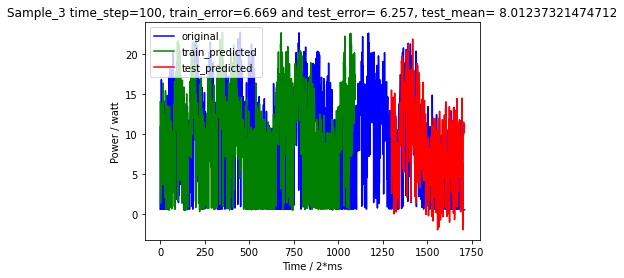

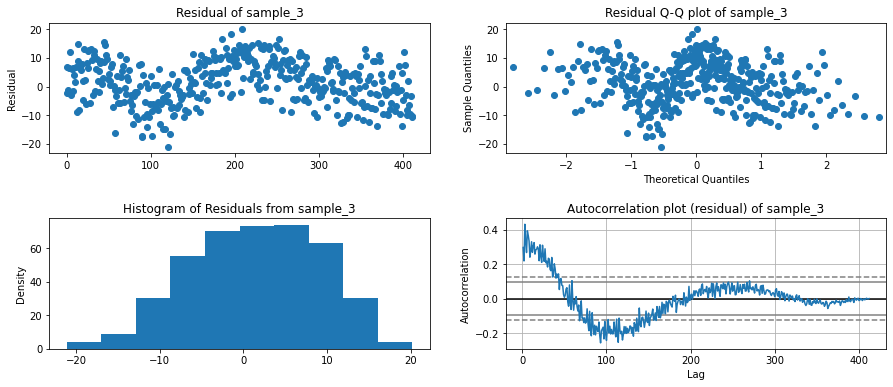

In [9]:
neural_score = {'train_error': [], 'test_error': [], 'time_step': []}
lstm_model_stk = []
for i, arr_data in enumerate(norm_df):
    # perform minmax scaler on dataset
    training_size = int(len(arr_data)*0.7)
    test_size = len(arr_data) - training_size
    time_step = 100
    # Extract test and train data
    train_data = arr_data[0:training_size]
    test_data = arr_data[training_size:]
    test_data.reset_index(drop=True,inplace=True)
    # create test and train dataset with a time bracket of 100 steps
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)
    # reshape the dataset
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    # Initialize the LSTM model and train it
    model = lstm_fun(n=50, m=time_step)
    model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=1000, batch_size=64, verbose=1)
    # Perform prediction on train and test dataset
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    # Calculate the mean absolute error and mean
    test_error = MAE(ytest, test_predict)
    train_error = MAE(y_train, train_predict)
    test_mean = np.mean(ytest)
    # plot the forecasted data along with original datset
    plt.plot(arr_data.index,arr_data['y'],label='original', color='b')
    plt.plot(arr_data.index.to_list()[:len(train_predict)],train_predict,label='train_predicted', color='g')
    plt.plot(arr_data.index.to_list()[-len(test_predict):],test_predict,label='test_predicted', color='r')
    plt.title('Sample_{i} time_step={x}, train_error={y} and test_error= {z}, test_mean= {a}'.format(i=i+1, x=time_step, y=train_error, z=test_error, a=test_mean))
    plt.legend(loc="upper left")
    plt.xlabel('Time / 2*ms')
    plt.ylabel('Power / watt')
    #plt.savefig('sample_{x}_predicted_lstm_{y}_time_step.png'.format(x=i, y=time_step))
    plt.show()
    residuals=[test_data['y'][i]-test_predict[i] for i in range(len(test_predict))]
    # Plot the residual
    plt.figure(figsize=(15, 6))
    ax0=plt.subplot(2, 2, 1)
    ax0.scatter(range(len(residuals)),residuals)# Plot the residual
    plt.ylabel('Residual')
    plt.title('Residual of sample_{i}'.format(i=i+1))
    residuals = np.array(residuals)
    ax1=plt.subplot(2, 2, 2)
    qqplot(residuals,ax=ax1)# Plot the Q-Q plot using the residuals
    plt.title('Residual Q-Q plot of sample_{i}'.format(i=i+1))
    ax2=plt.subplot(2, 2, 3)
    ax2.hist(residuals)# Plot histogram from the residuals
    plt.ylabel('Density')
    plt.title('Histogram of Residuals from sample_{i}'.format(i=i+1))
    ax3=plt.subplot(2, 2, 4)
    autocorrelation_plot(pd.DataFrame(residuals),ax=ax3)# Plot autocorrelation plot from the residual
    plt.title('Autocorrelation plot (residual) of sample_{i}'.format(i=i+1))
    plt.subplots_adjust(hspace = 0.5)
    plt.show()
